# Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset

df = pd.read_csv('C:\winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

# Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)


In [3]:
#first 10 data
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [4]:
#last 10 data
df.tail(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1589                 29.0                  79.0  0.99770  3.29       0.54   
1590                 26.0                  35.0  0.99314  3.32       0.82   
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1589      9.2        5  
1590     11.6        6  
1591     11.6        6  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [5]:
#dimensons of dataset
df.shape

(1599, 12)

this dataset contains 1599 rows and 2 columns, out of which 11 columns are independent variables and 1 column is target variable

In [6]:
#datatype of columns

df.info()

#or df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


there are 2 different types of data(float64 and int64) in this dataset

In [7]:
#Checking null values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

From initial observations we can see that there are no null values present in the dataset|

<AxesSubplot:>

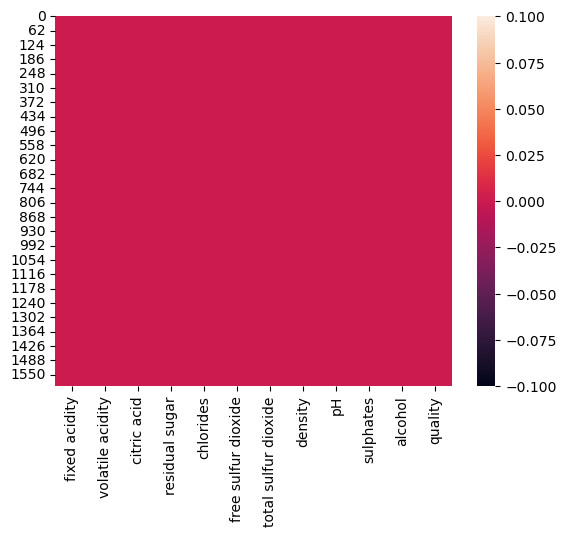

In [8]:
#plotting heatmap to confirm observation
sns.heatmap(df.isnull())

In [9]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
#checking value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

so far data looks free of null values
also the target variable (quality) has 6 categories (3,4,5,6,7,8)

In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
df['quality'].nunique()

6

confirmed the observation for target variable using unique and nunique method

In [13]:
#checking number of unique values present in each column
df.nunique().to_frame("No. of unique values")

No. of unique values
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6

In [14]:
#checking duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [15]:
df.duplicated().sum()

240

In [16]:
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

index 0 and index 4 have same data, from this we can conclude that duplicates are there in our dataset

In [17]:
#dropping duplicates
df1 = df. drop_duplicates()

In [18]:
df1.shape

(1359, 12)

In [19]:
df1.duplicated().sum()

0

In [20]:
#resetting the index
df1.reset_index(inplace = True,drop = True)

In [21]:
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1354            6.8             0.620         0.08             1.9      0.068   
1355            6.2             0.600         0.08             2.0      0.090   
1356            5.9             0.550         0.10             2.2      0.062   
1357            5.9             0.645         0.12             2.0      0.075   
1358            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1354                 28.0                  38.0  0.99651  3.42       0.82   
1355                 32.0                  44.0  0.99490  3.45       0.58   
1356                 39.0                  51.0  0.99512  3.52       0.76   
1357                 32.0                  44.0  0.99547  3.57       0.71   
1358                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1354      9.5        6  
1355     10.5        5  
1356     11.2        6  
1357     10.2        5  
1358     11.0        6  

[1359 rows x 12 columns]

In [22]:
#checking value count of quality column
df1['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

we have dropped the duplicated data present in our dataset and reset the index

Setting an arbitrary cutoff for dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [23]:
#converting all values in the ‘quality’ column that are greater than or equal to 7 to 1, and all other values to 0.
#where 1 indicates good quality wine and 0 indicates poor quality wine
df1['quality'] = (df1['quality'] >=7).astype('int64')

In [24]:
df1['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

datapoints for good quality wines(1) nd bad quality wines(0) looks imbalanced, hence there is a chance of dataset being imbalanced
we will deal with this later

In [25]:
df1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0

In [26]:
#checking the dtype of target variable
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [27]:
# statistical information of dataset
df1.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     0.135394  
std       0.155036     0.170667     1.082065     0.342270  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     0.000000  
75%       3.400000     0.730000    11.100000     0.000000  
max       4.010000     2.000000    14.900000     1.000000

# Observations

1. No negative values present
2. count of all the columns are same which further supports our observation of no null values present
3. mean is greater than median in all the columns except pH, this means that the data is skewed to right in these columns
4. there is a huge differenece between 75% and max in fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide columns which might indicate the presence of outliers

# Data Visualization
Objective : Plotting graphs To confirm our observations on :
1) Skewness
2) Outliers
3) Imbalance

and to check correlation between features vs feature and features vs target for further feature selection

0    1175
1     184
Name: quality, dtype: int64


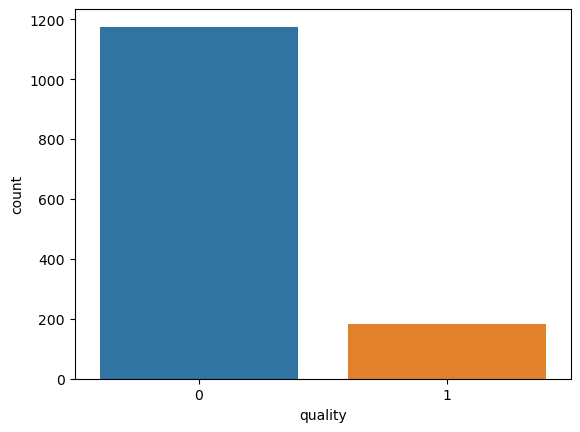

In [28]:
#Univariate Analysis

im = sns.countplot(x = 'quality',data = df1)
print(df1['quality'].value_counts())

the above graph confirms our observation of data imbalance as data for poor quality wine is more than good quality which will lead to biasness in the model prediction

In [29]:
#seperating features and tagret variable
y = df1['quality']
X = df1.drop(columns = ['quality'])

In [30]:
print(y)
print(X)

0       0
1       0
2       0
3       0
4       0
       ..
1354    0
1355    0
1356    0
1357    0
1358    0
Name: quality, Length: 1359, dtype: int64
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1354            6.8             0.620         0.08             1.9      0.068   
1355            6.2             0.600         0.08             2.0      0.090   
1356            5.9             0.550         0.10             2.2      0.062   
1357            5.9             0.645 

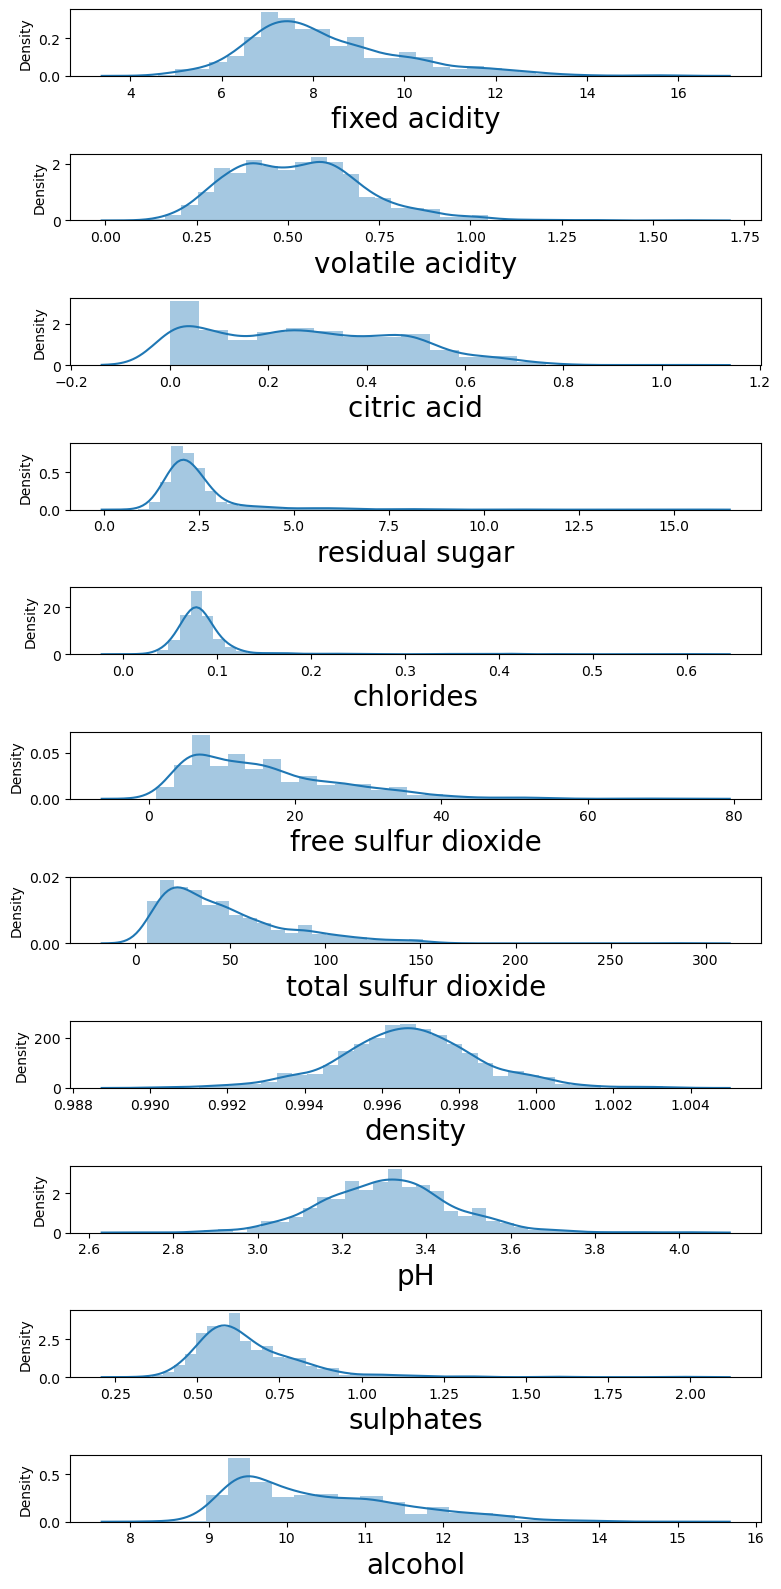

In [31]:
plt.figure(figsize = (8,16), facecolor = 'white')
plotnumber = 1 # assigning variable

for column in X:
    if plotnumber<= 11:
        ax = plt.subplot(11,1,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1

plt.tight_layout()

From the above graph we can see that all the columns have skewness to the right side except pH

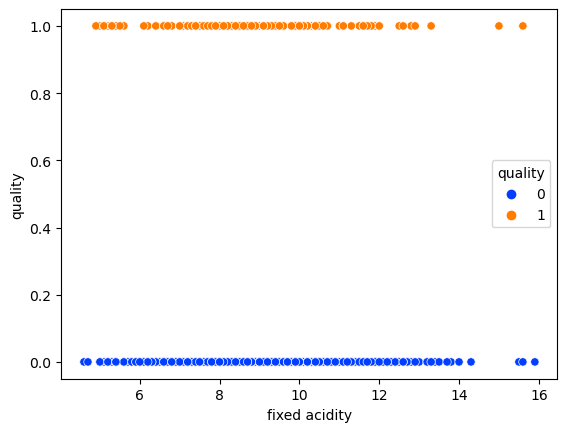

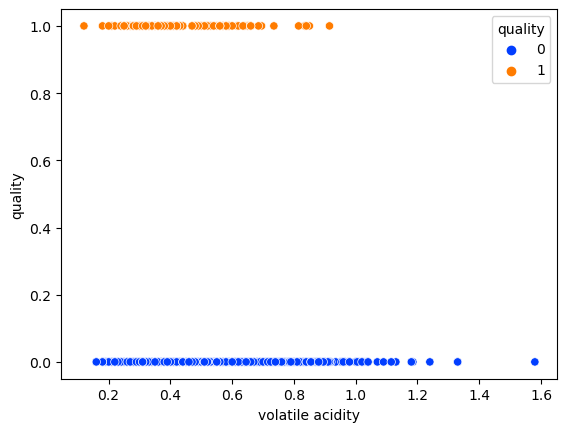

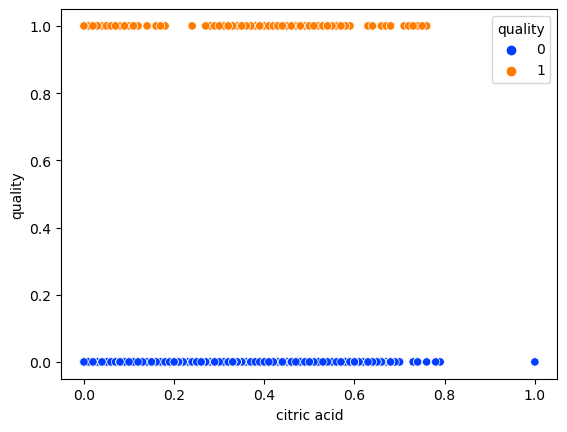

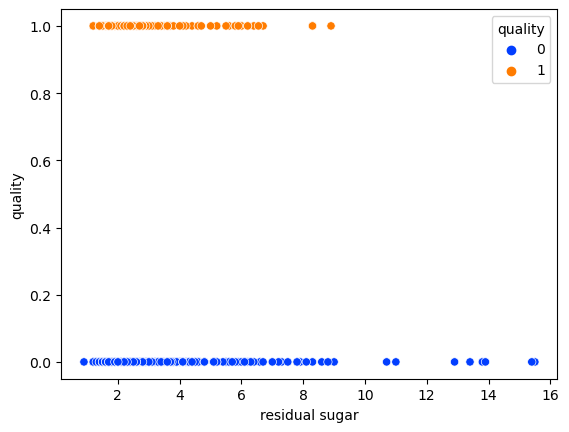

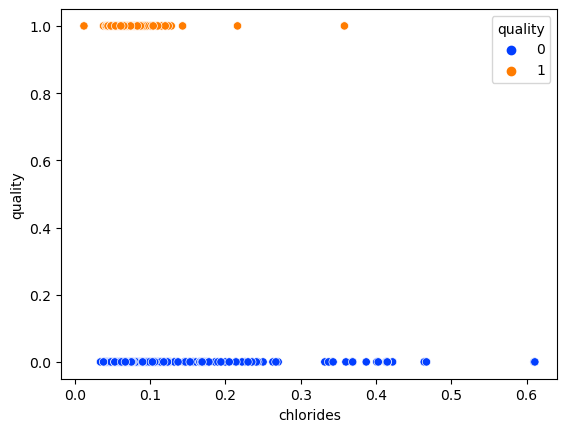

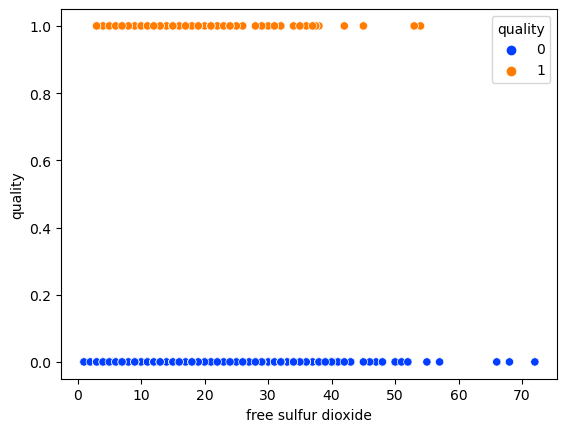

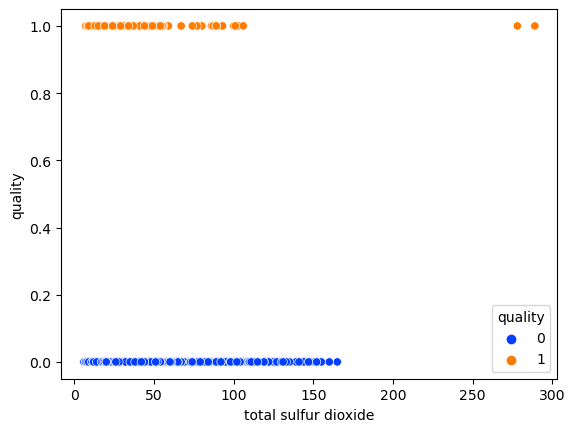

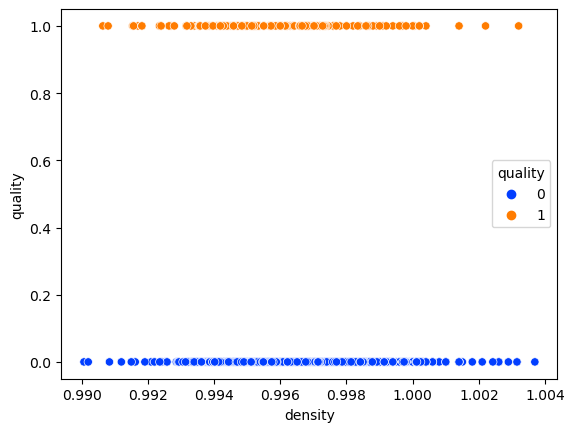

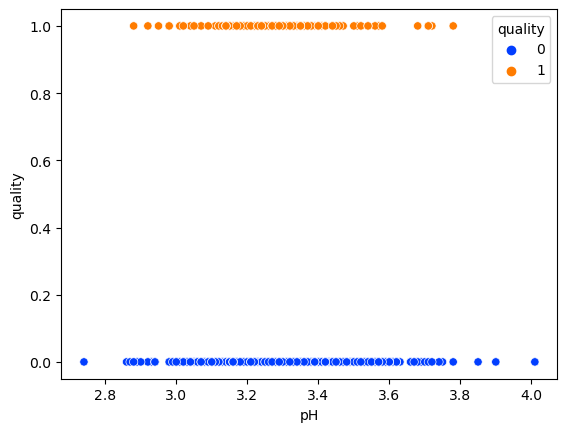

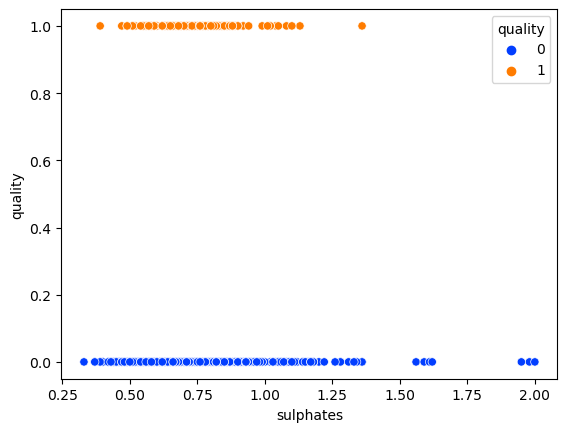

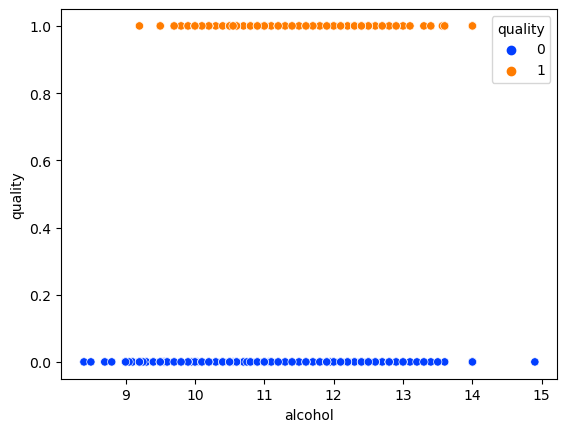

In [32]:
#Bivariate analysis
#Comparison between

for column in df.columns:
    if column != 'quality':
        sns.scatterplot(df1[column],df1['quality'], hue = df1['quality'], palette = 'bright')
        plt.xlabel(column)
        plt.ylabel('quality')
        plt.show()

from the above graph it is inconclusive that whether features and targets have relations or not

finding relation between features and features

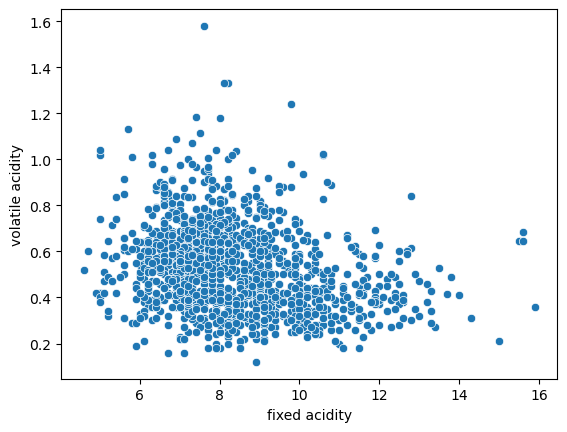

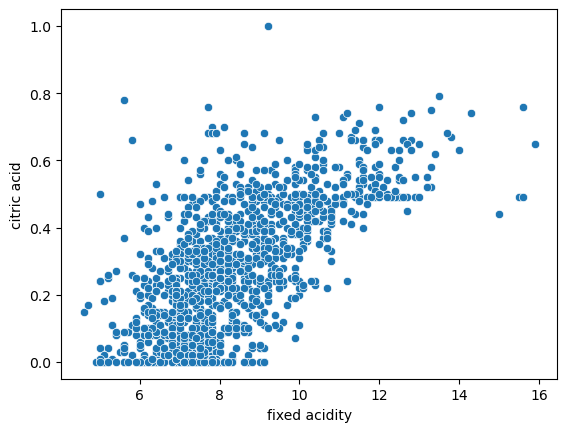

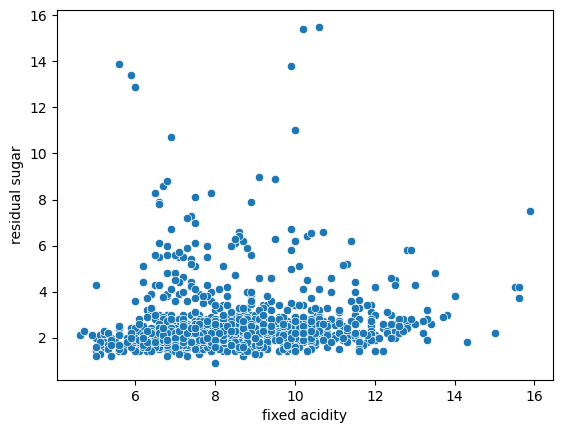

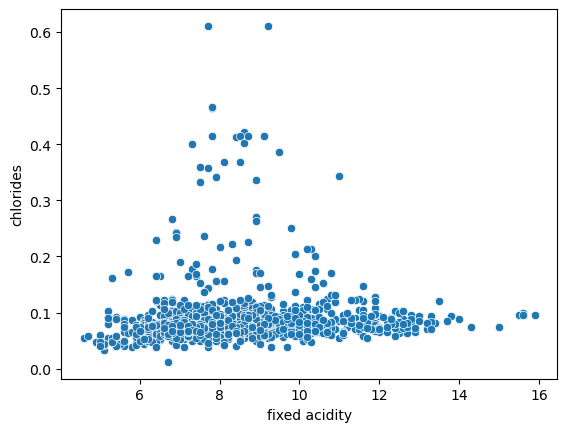

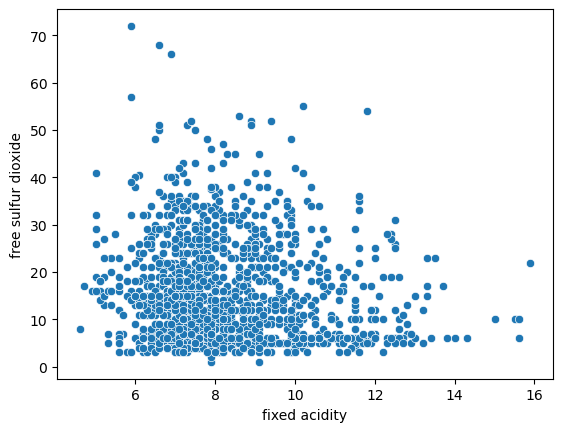

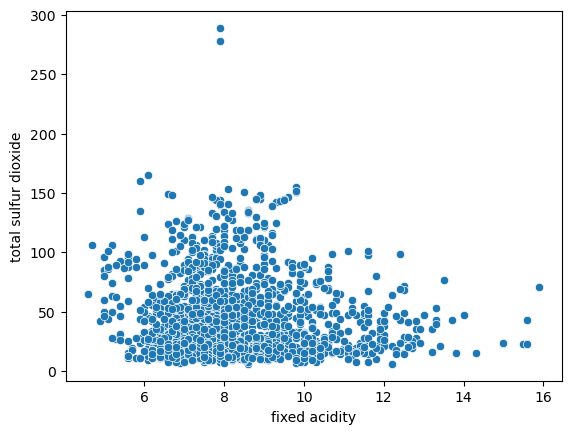

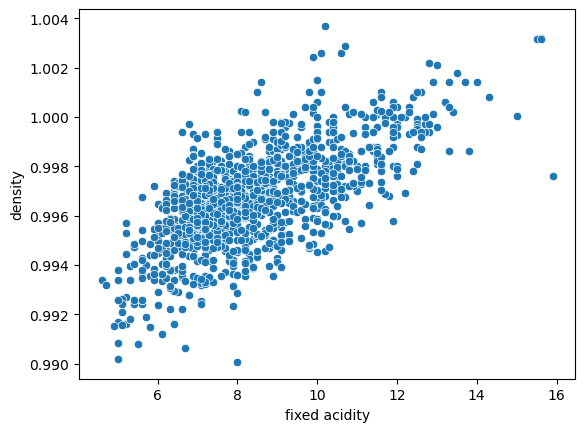

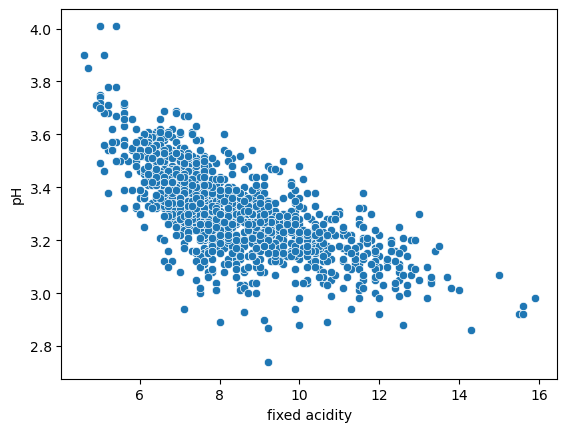

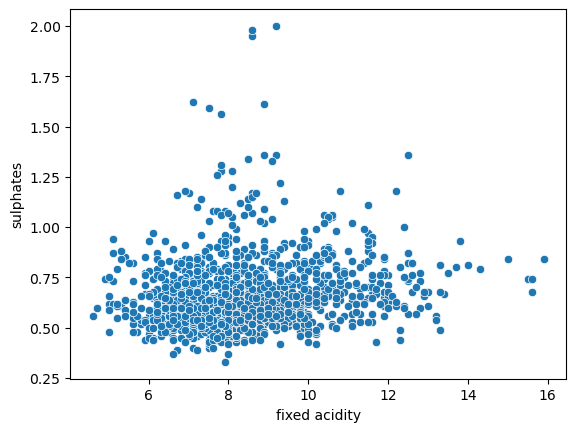

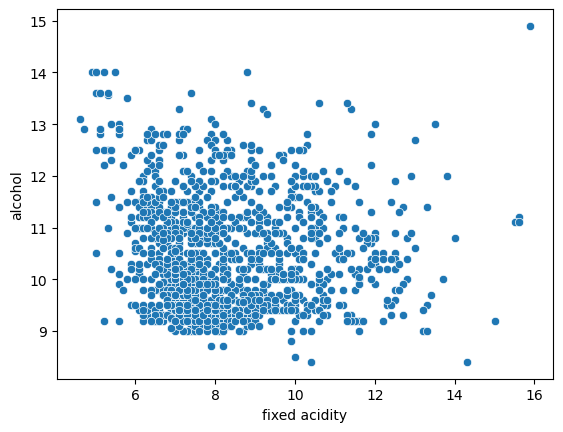

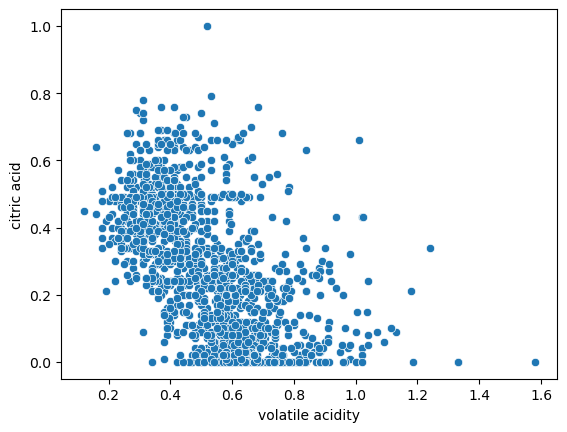

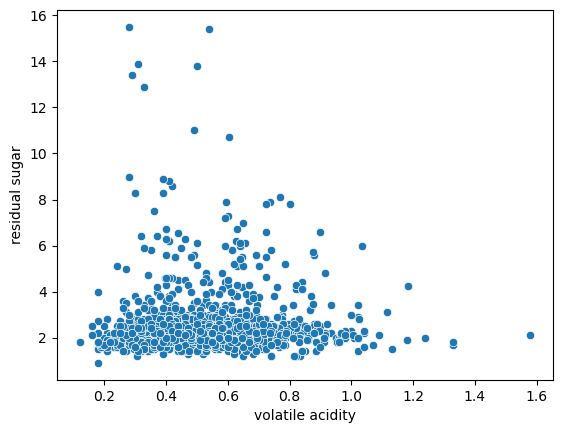

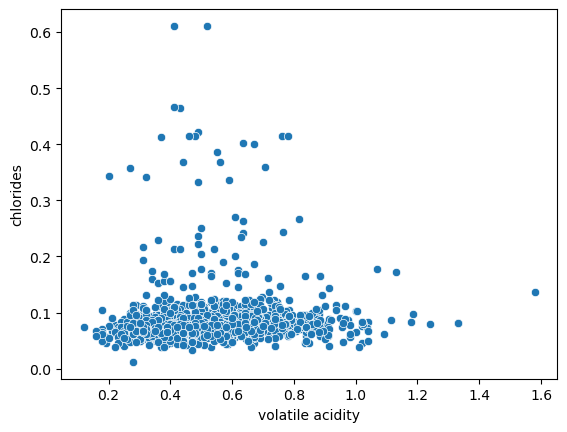

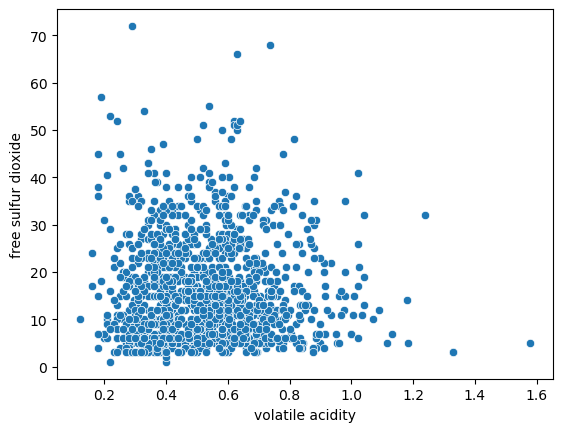

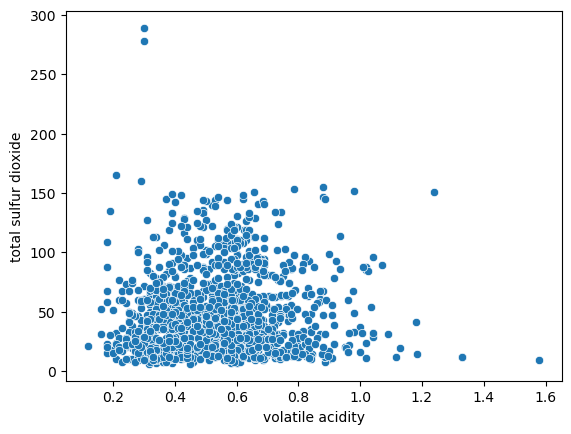

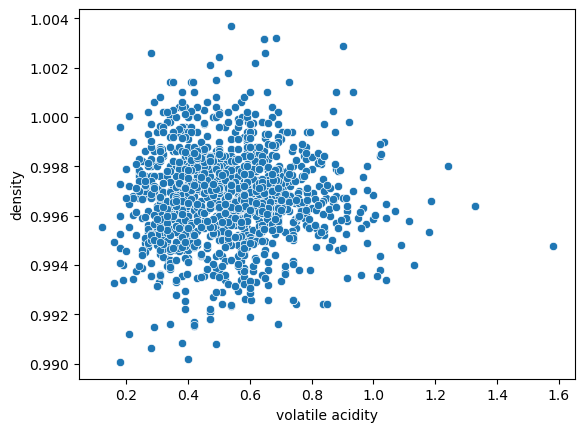

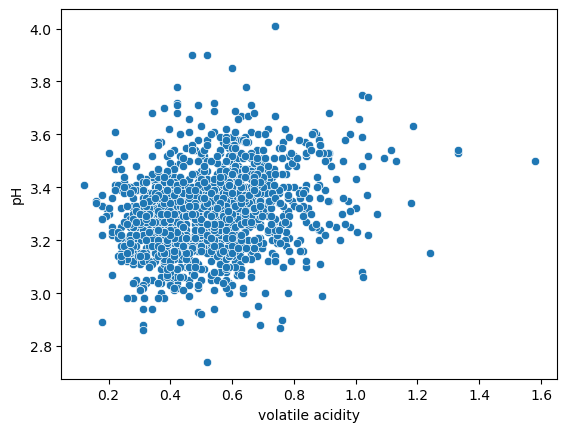

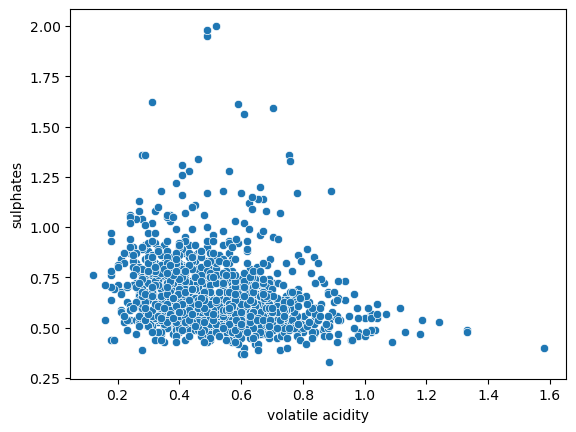

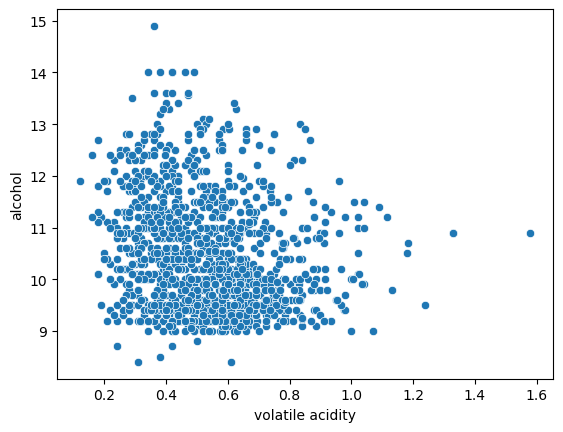

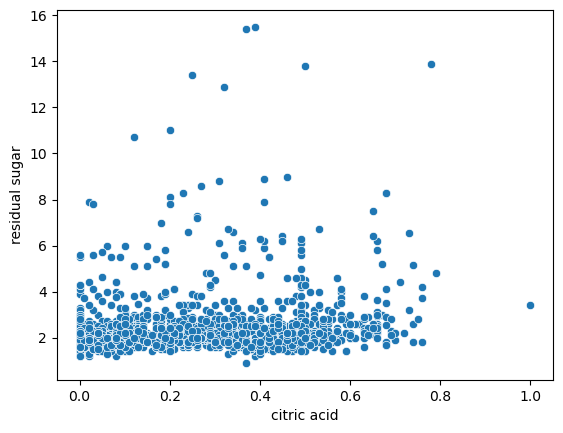

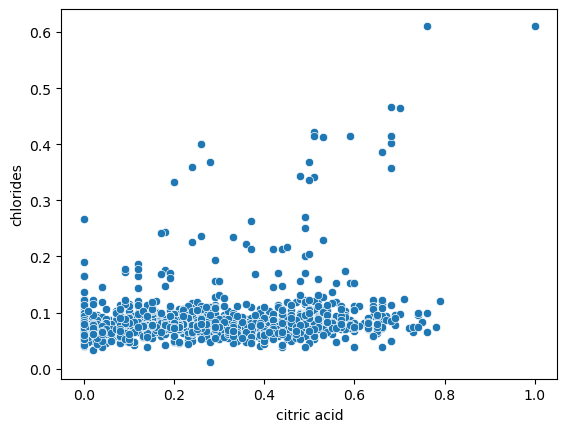

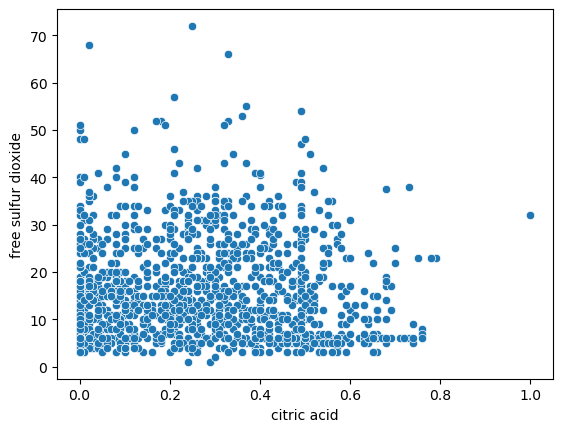

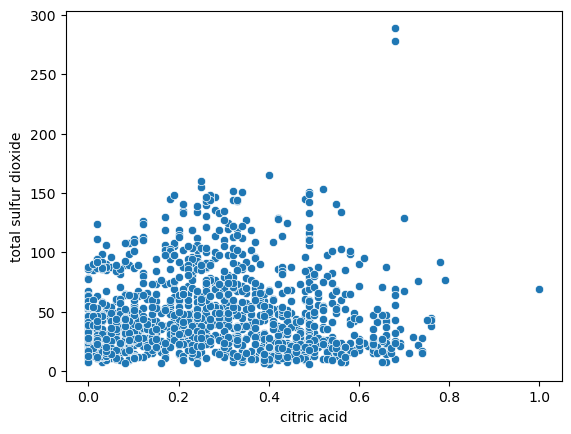

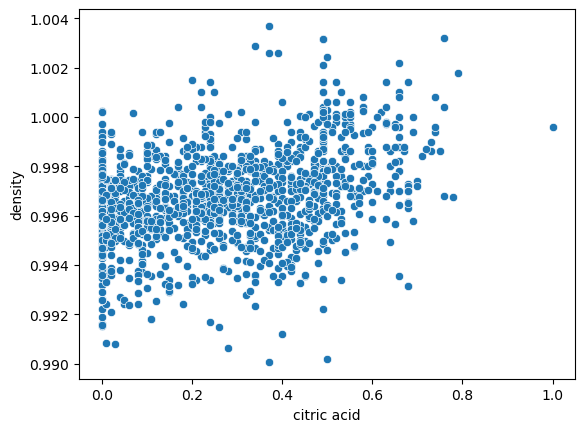

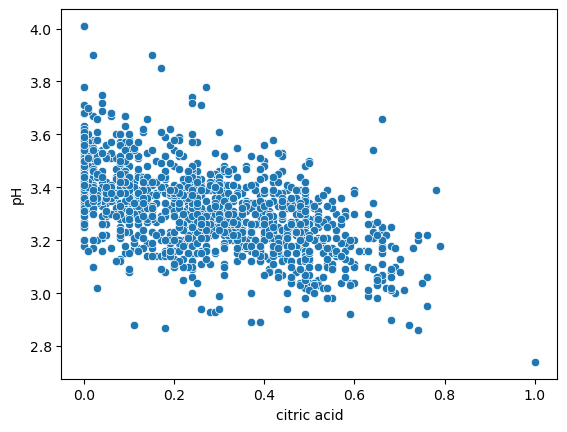

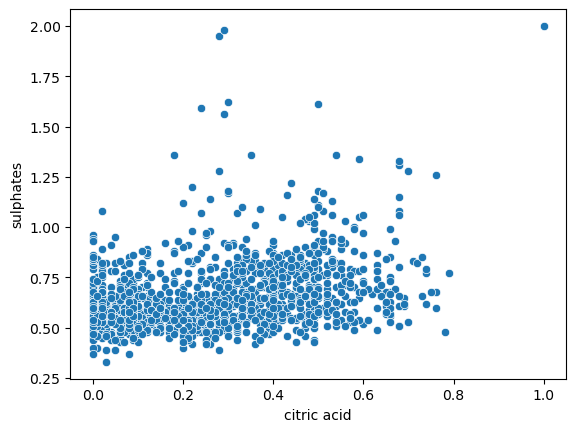

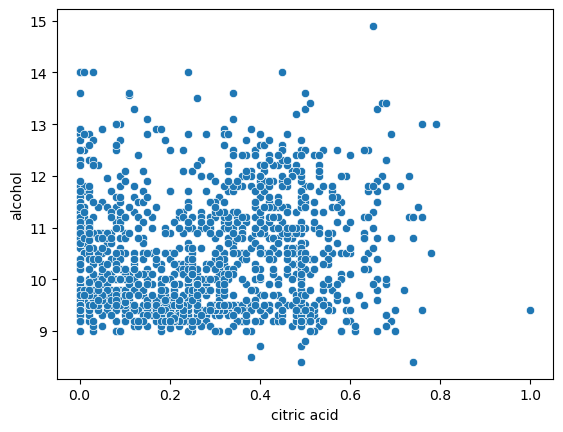

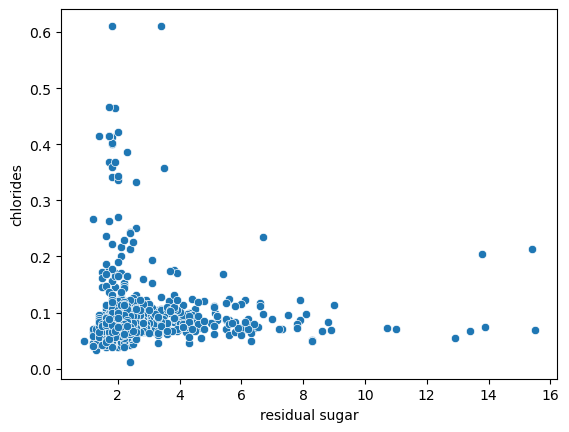

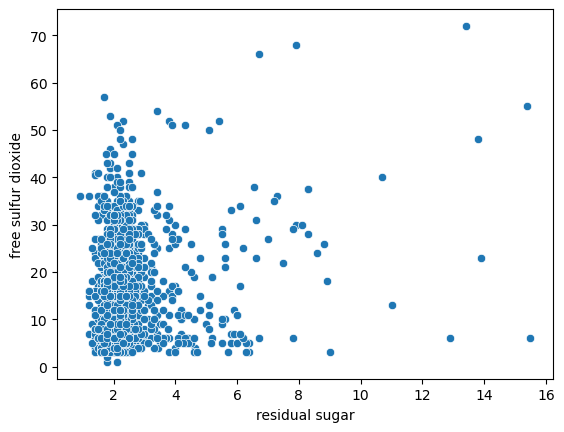

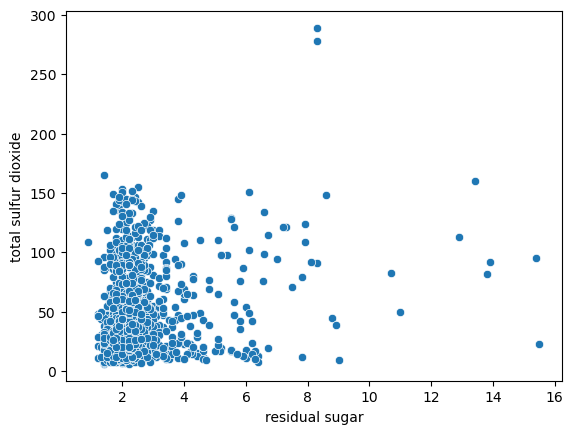

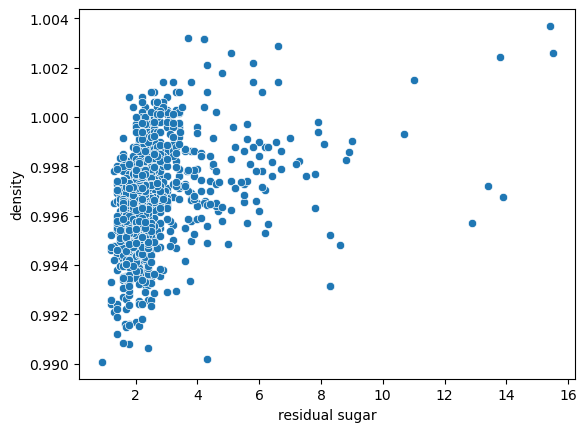

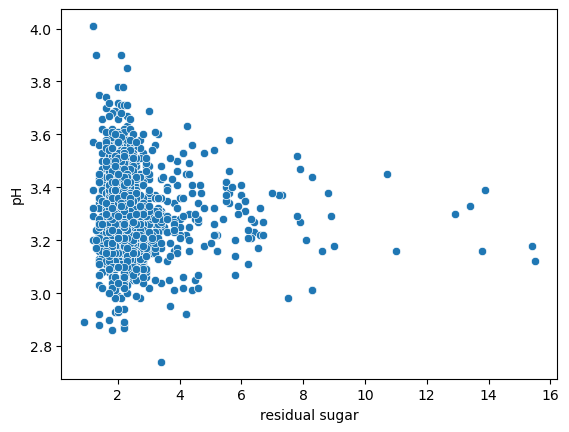

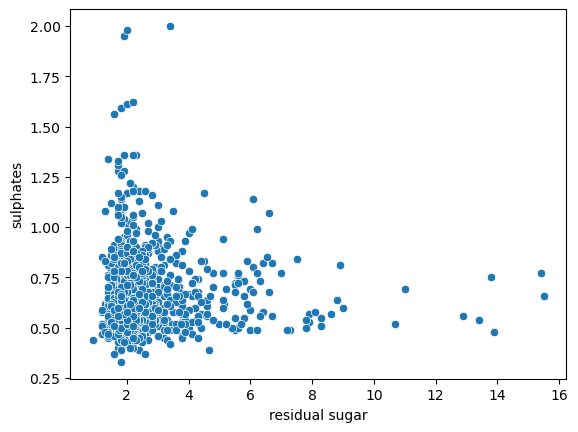

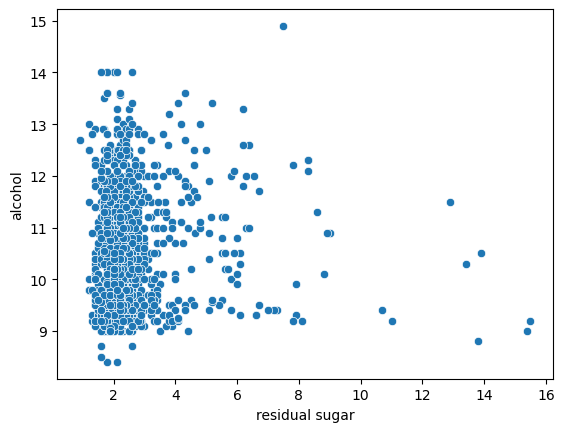

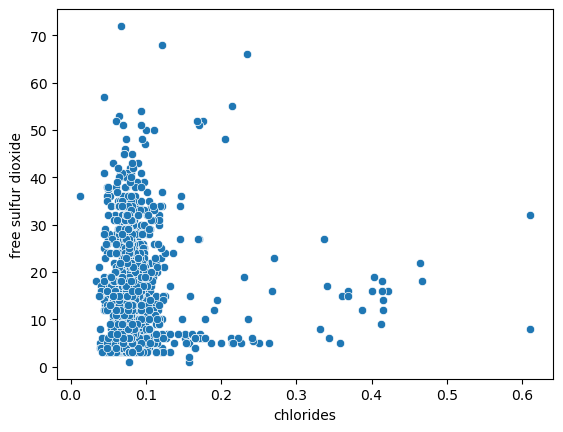

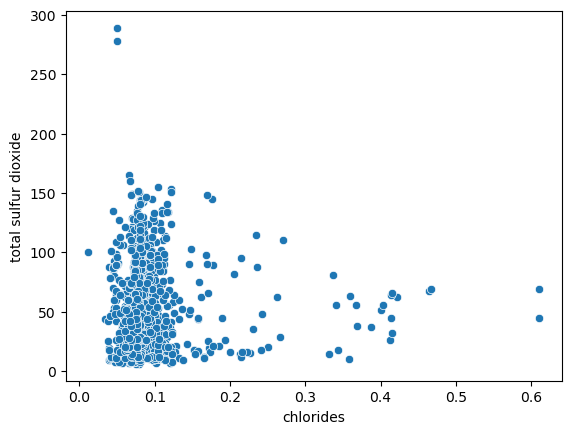

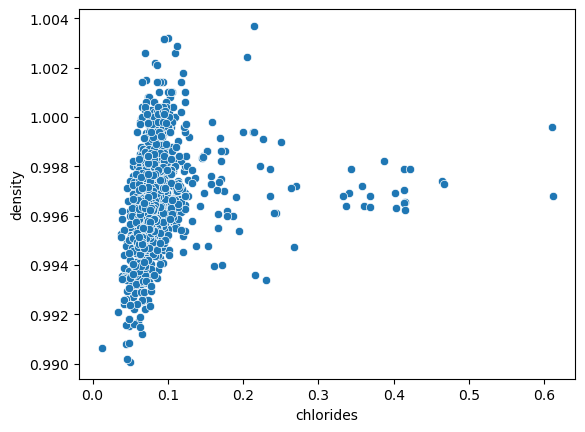

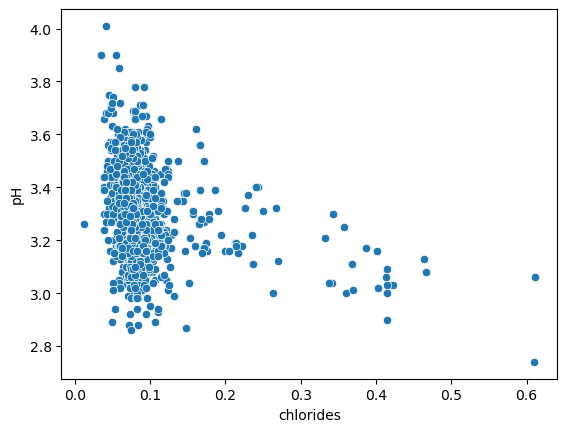

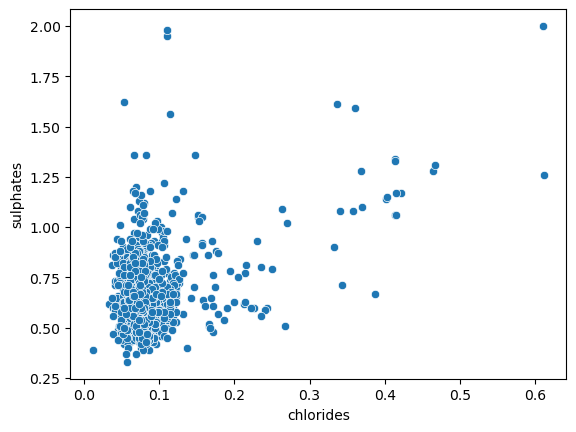

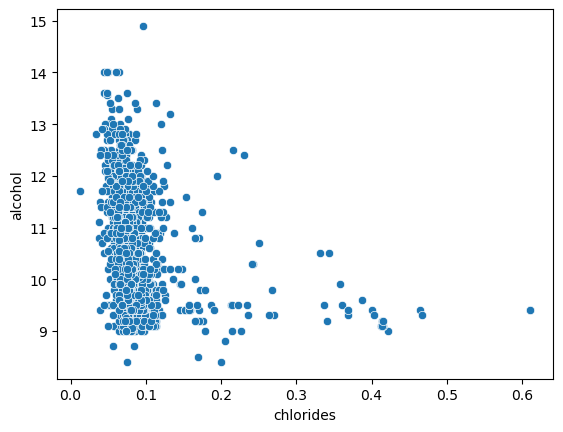

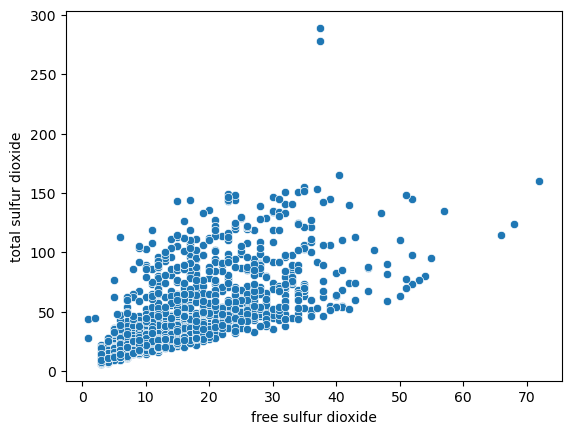

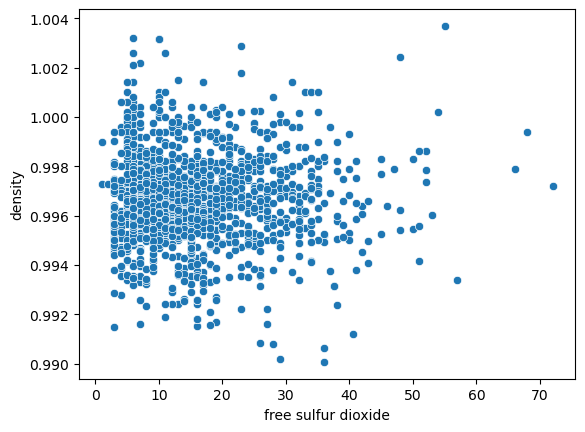

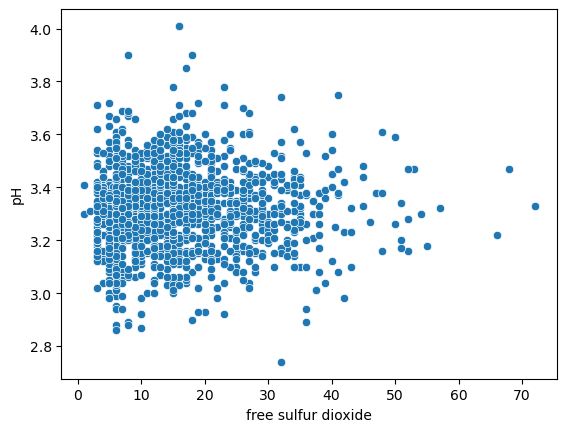

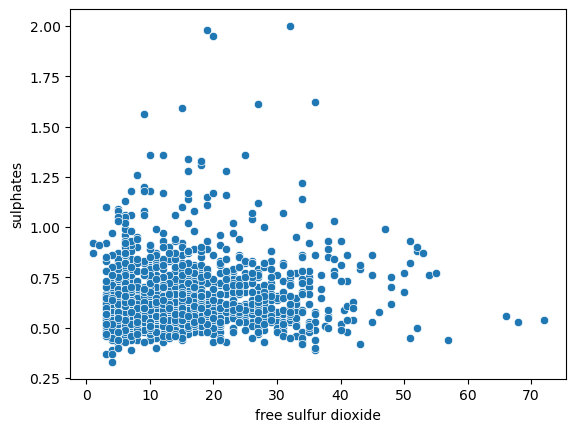

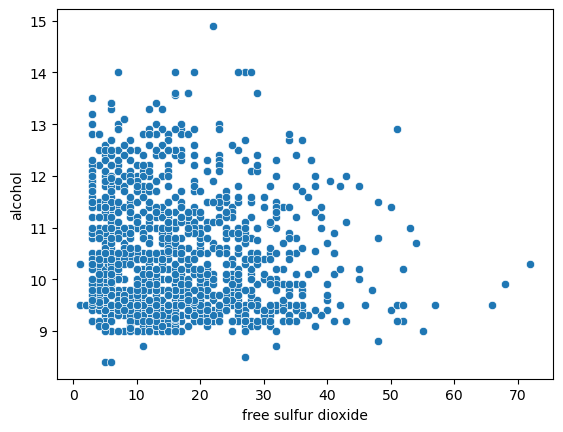

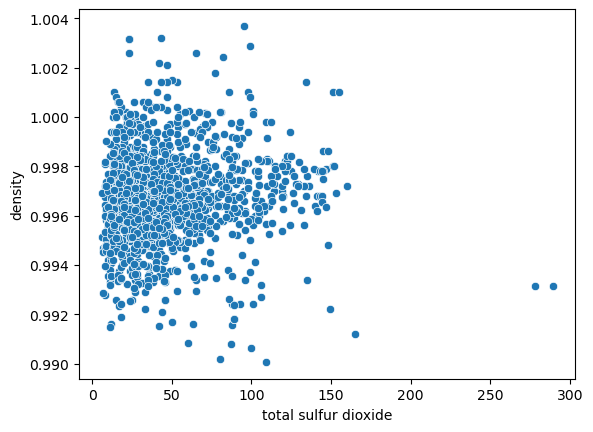

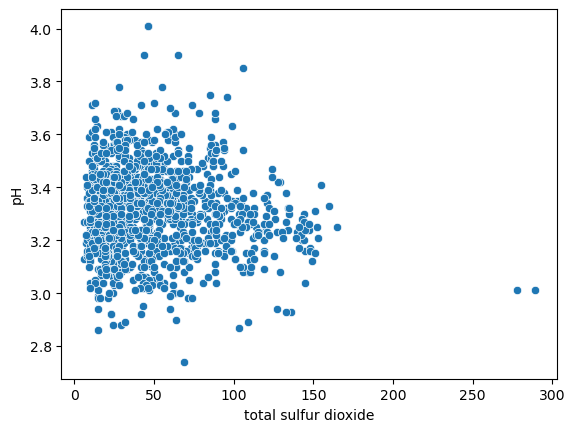

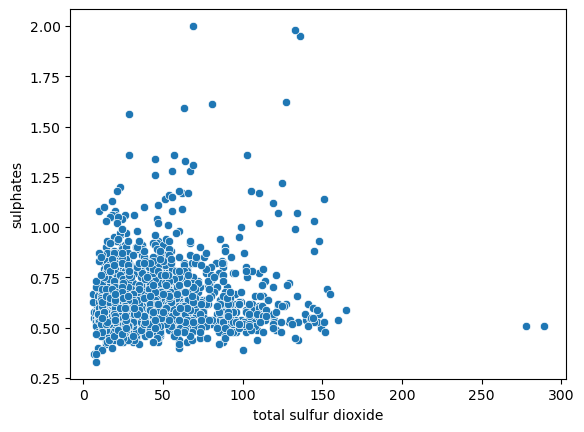

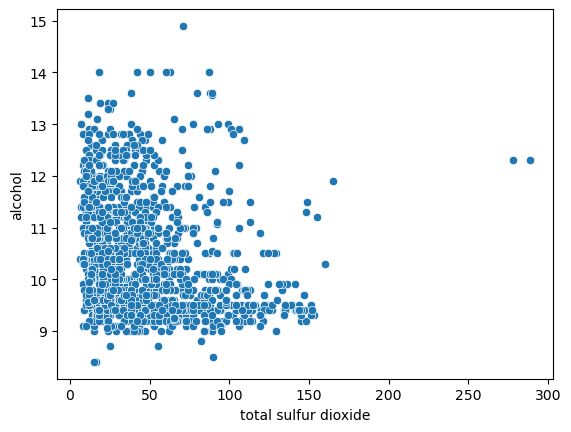

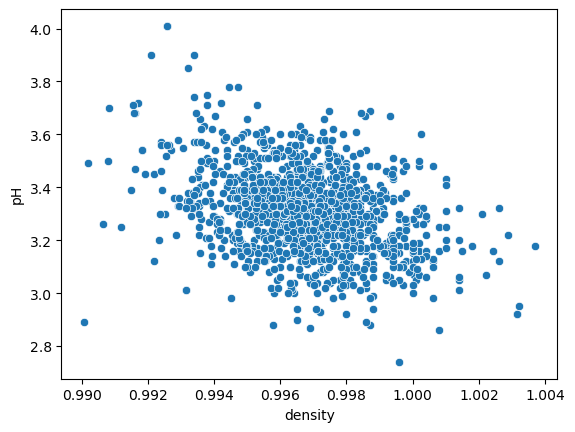

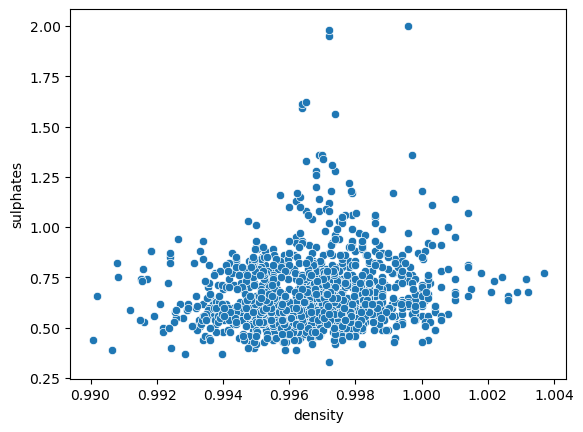

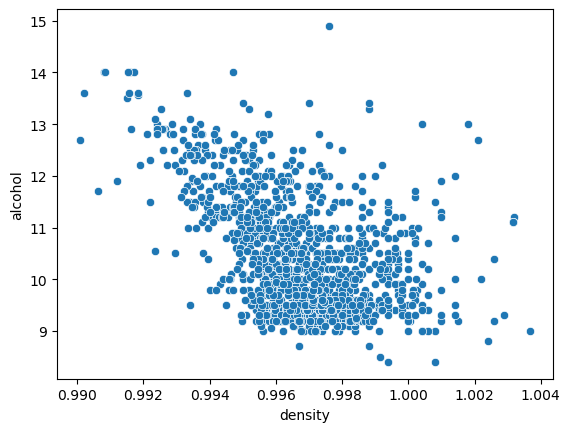

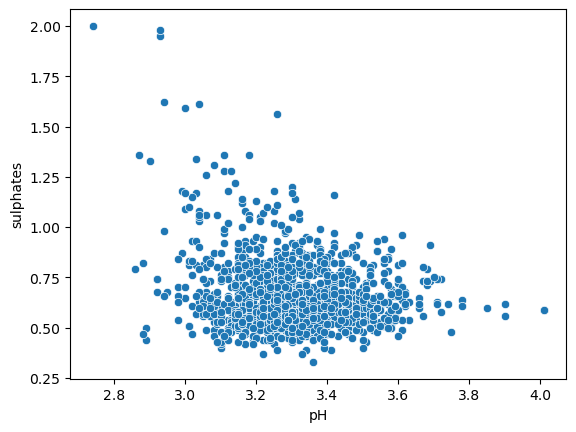

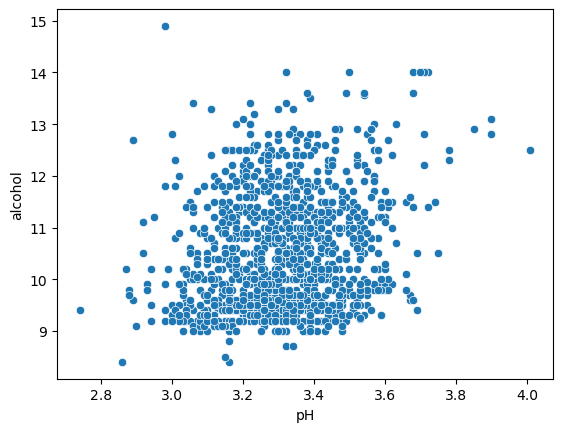

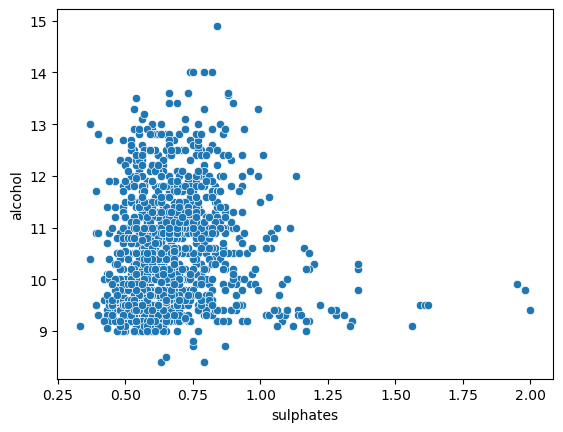

In [33]:
for i, column1 in enumerate(df1.columns):
    for j, column2 in enumerate(df1.columns):
        if i < j and column1 != 'quality' and column2 != 'quality':
            sns.scatterplot(df1[column1], df1[column2])
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()

we can see from the above graph that correlation between features exist

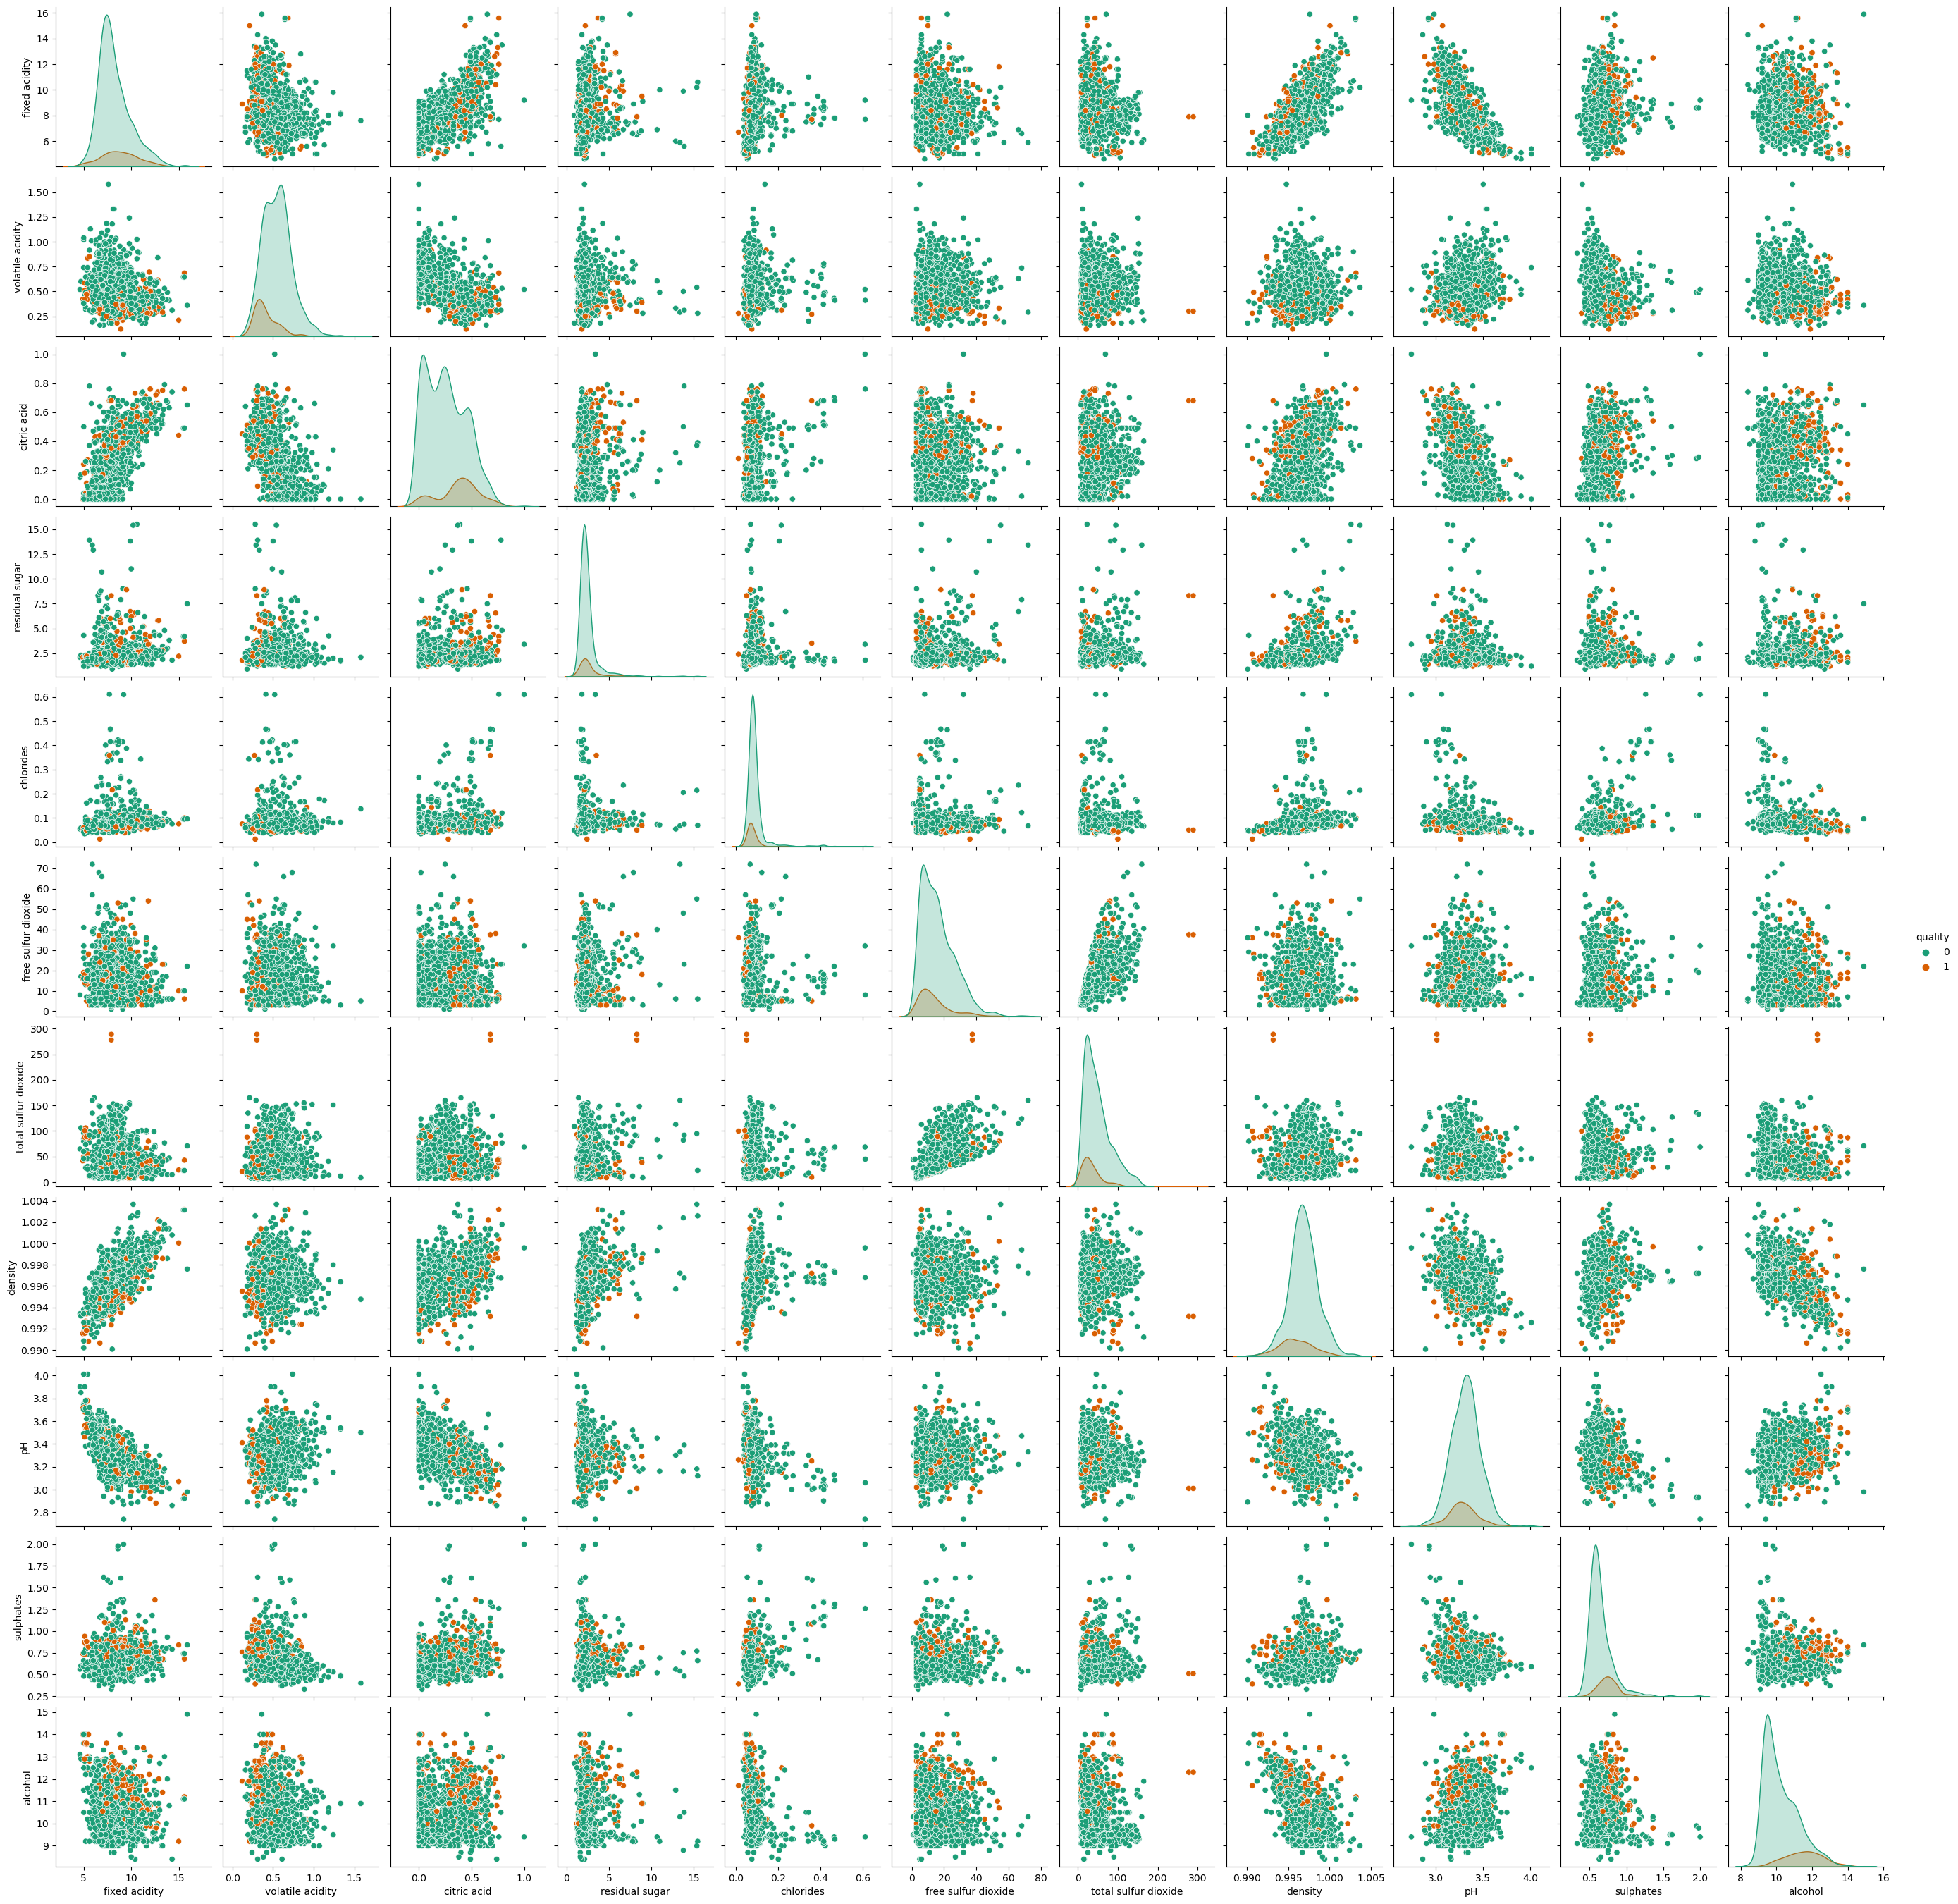

In [34]:
sns.pairplot(df1, hue = 'quality', palette = 'Dark2')
plt.show()

inconclusive

In [35]:
df1_corr = df1.corr()
df1_corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.116120         -0.267344     0.203561   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.052811  -0.096806            -0.072771   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.135877 -0.158052 -0.054131   0.201551   

                       alcohol   quality  
fixed acidity        -0.061596  0.116120  
volatile acidity     -0.197812 -0.267344  
citric acid           0.105108  0.203561  
residual sugar        0.063281  0.052811  
chlorides            -0.223824 -0.096806  
free sulfur dioxide  -0.080125 -0.072771  
total sulfur dioxide -0.217829 -0.135877  
density              -0.504995 -0.158052  
pH                    0.213418 -0.054131  
sulphates             0.091621  0.201551  
alcohol               1.000000  0.409926  
quality               0.409926  1.000000

Plotting heatmap

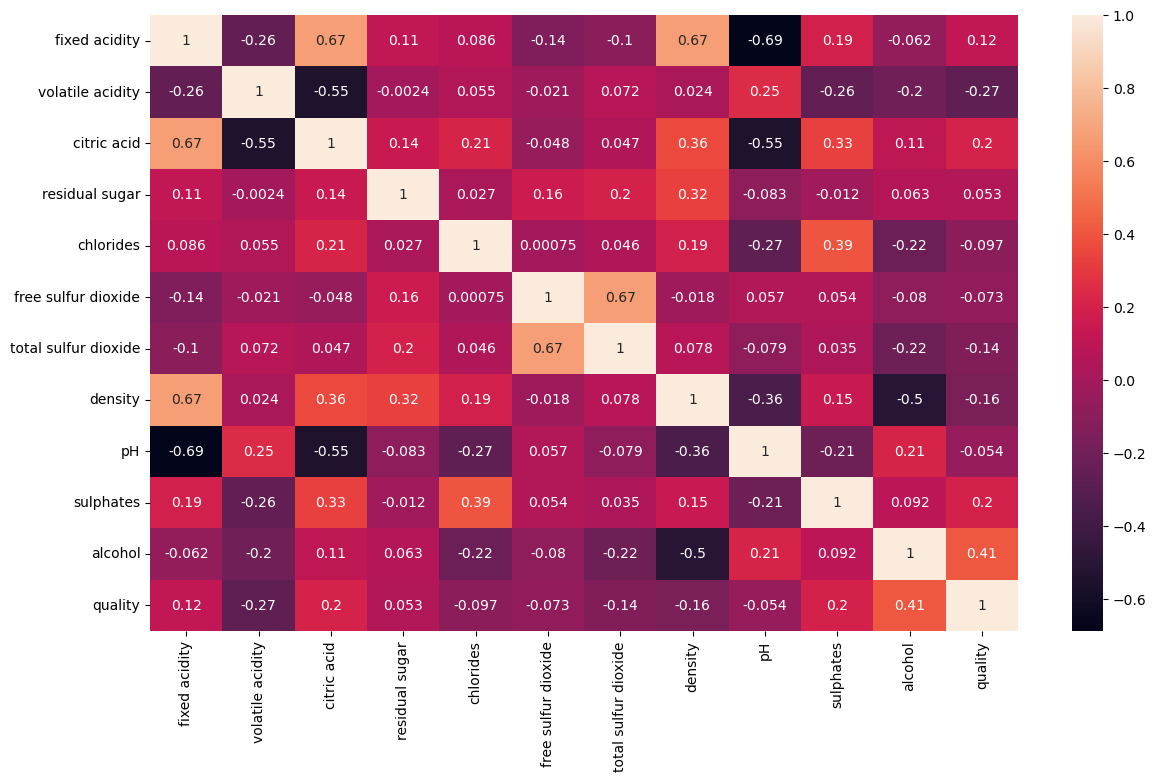

In [36]:
plt.figure(figsize = (14,8))
sns.heatmap(df1_corr,annot = True, annot_kws = {'size':10})
plt.show()

# Observations

1. The quality of wine is positively correlated with alcohol (0.41), sulphates (0.20), and citric acid (0.20). This means that higher values of these variables tend to be associated with higher quality ratings.

2. The quality of wine is negatively correlated with volatile acidity (-0.27), density (-0.16), total sulfur dioxide (-0.14), and chlorides (-0.10). This means that lower values of these variables tend to be associated with higher quality ratings.

3.There are some strong correlations between some of the input variables, such as fixed acidity and pH (-0.69), fixed acidity and density (0.67), citric acid and pH (-0.55), and citric acid and volatile acidity (-0.55). This indicates that there may be some multicollinearity issues in the dataset, which can affect the performance of some regression models.


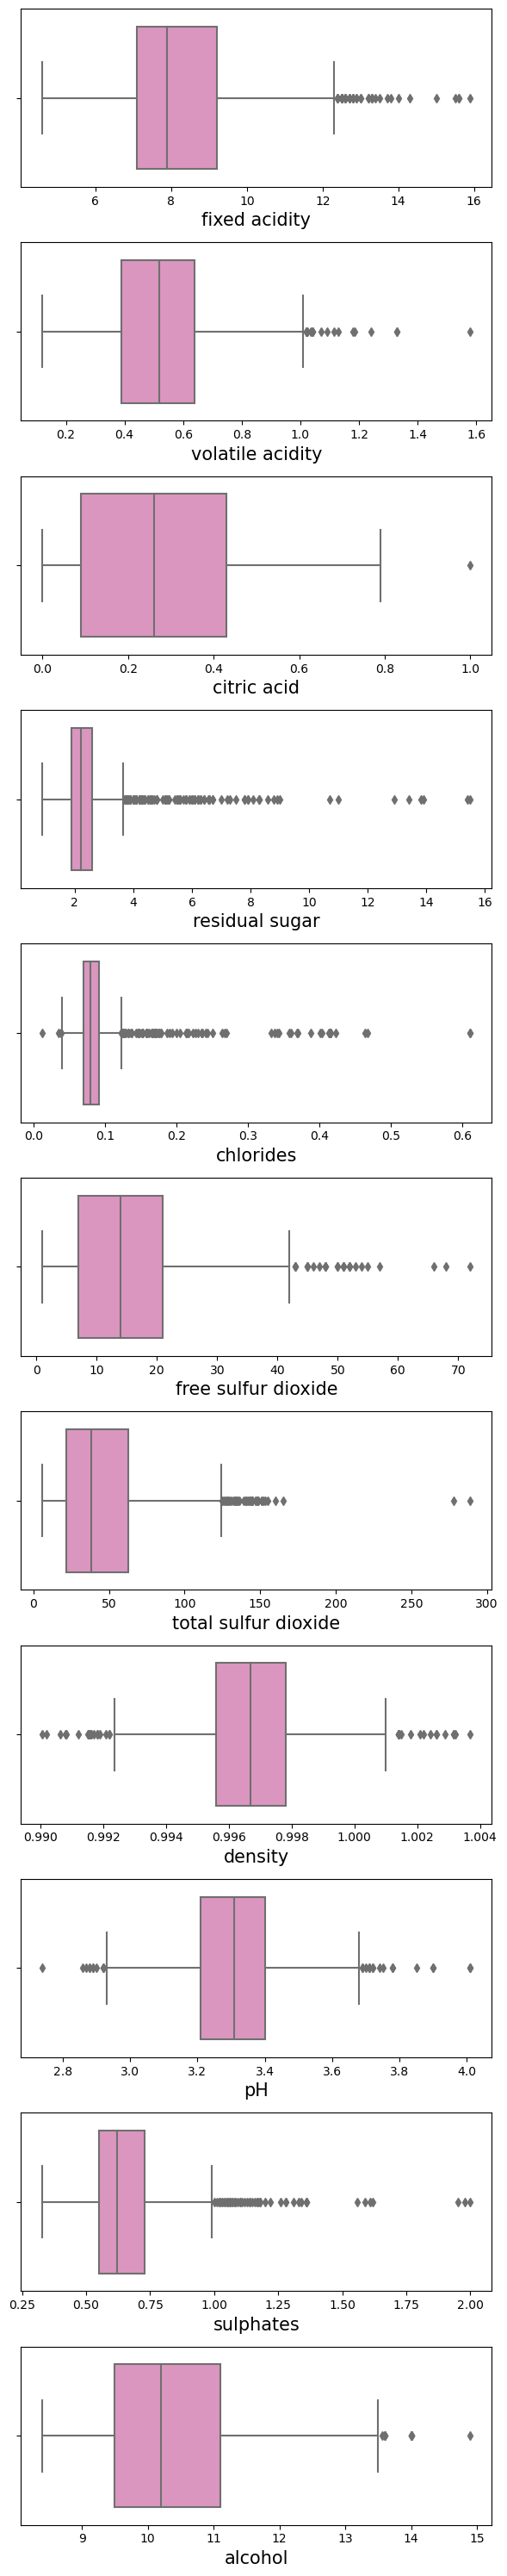

In [37]:
#Outlier Detection

plt.figure(figsize = (6,30), facecolor = 'white')
plotnumber = 1
for col in df1:
    if plotnumber <= 11:
        ax = plt.subplot(11,1, plotnumber)
        sns.boxplot(df1[col], palette = 'Set2_r')
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumber += 1
plt.tight_layout()

from above boxplot we can conclude that outliers are present in all features 

In [38]:
#evaluating zscore for outlier detection
from scipy.stats import zscore
z = np.abs(zscore(X))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.524431          0.932000     1.393258        0.461157   0.245623   
1          0.294063          1.915800     1.393258        0.056665   0.200094   
2          0.294063          1.259934     1.188617        0.165259   0.078535   
3          1.664067          1.363534     1.471711        0.461157   0.265883   
4          0.524431          0.713378     1.393258        0.535132   0.265883   
...             ...               ...          ...             ...        ...   
1354       0.869983          0.494756     0.983977        0.461157   0.407702   
1355       1.215536          0.385444     0.983977        0.387183   0.038015   
1356       1.388312          0.112167     0.881656        0.239233   0.529261   
1357       1.388312          0.631395     0.779336        0.387183   0.265883   
1358       1.330720          1.199567     1.011270        0.796410   0.427962   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.468554              0.384050  0.584003  1.291872   
1                0.872003              0.604073  0.048737  0.708395   
2                0.085537              0.214813  0.155790  0.321247   
3                0.105971              0.394471  0.691057  0.966495   
4                0.277045              0.204391  0.584003  1.291872   
...                   ...                   ...       ...       ...   
1354             1.159265              0.264277  0.106490  0.711149   
1355             1.542281              0.084619  0.968269  0.904724   
1356             2.212559              0.124983  0.850510  1.356397   
1357             1.542281              0.084619  0.663167  1.679021   
1358             0.201725              0.144505  0.652461  0.517575   

      sulphates   alcohol  
0      0.578561  0.954374  
1      0.124822  0.584575  
2      0.051024  0.584575  
3      0.461331  0.584575  
4      0.578561  0.954374  
...         ...       ...  
1354   0.945435  0.861924  
1355   0.461331  0.062574  
1356   0.593744  0.709723  
1357   0.300667  0.214775  
1358   0.007591  0.524824  

[1359 rows x 11 columns]

In [39]:
#threshold >3
np.where(z>3)

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
          41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
          99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
         150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
         252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
         363,  385,  385,  393,  408,  420,  420,  433,  448,  473,  483,
         483,  485,  485,  492,  506,  510,  513,  516,  528,  534,  555,
         562,  562,  564,  565,  565,  565,  582,  582,  592,  597,  599,
         602,  626,  627,  632,  652,  671,  672,  687,  710,  722,  764,
         764,  781,  786,  791,  792,  838,  866,  888,  895,  895,  912,
         918,  918,  920,  920,  945,  948,  963,  985,  994, 1003, 1013,
        1049, 1052, 1060, 1060, 1060, 1073, 1081, 1081, 1082, 1082, 1103,
        1106, 1107, 1117, 1121, 1123, 1123, 1125, 1151, 1159, 1162, 1165,
        1216, 1216, 1216, 1250, 1250, 

In [40]:
#making a new dataframe removing outliers
df2 = df1[(z<3).all(axis =1)]
df2.shape

(1239, 12)

In [41]:
print('Old Data Frame shape', df1.shape[0])
print('New Data Frame shape', df2.shape[0])

Old Data Frame shape 1359
New Data Frame shape 1239


In [42]:
print('Data Loss Percentage = ', ((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

Data Loss Percentage =  8.830022075055188


Data loss percentage is below 10% with z score method. Lets check by iqr method also

In [43]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for the outliers
df3 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [44]:
df2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1354            6.8             0.620         0.08             1.9      0.068   
1355            6.2             0.600         0.08             2.0      0.090   
1356            5.9             0.550         0.10             2.2      0.062   
1357            5.9             0.645         0.12             2.0      0.075   
1358            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1354                 28.0                  38.0  0.99651  3.42       0.82   
1355                 32.0                  44.0  0.99490  3.45       0.58   
1356                 39.0                  51.0  0.99512  3.52       0.76   
1357                 32.0                  44.0  0.99547  3.57       0.71   
1358                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1354      9.5        0  
1355     10.5        0  
1356     11.2        0  
1357     10.2        0  
1358     11.0        0  

[1239 rows x 12 columns]

In [45]:
df3

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1354            6.8             0.620         0.08             1.9      0.068   
1355            6.2             0.600         0.08             2.0      0.090   
1356            5.9             0.550         0.10             2.2      0.062   
1357            5.9             0.645         0.12             2.0      0.075   
1358            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1354                 28.0                  38.0  0.99651  3.42       0.82   
1355                 32.0                  44.0  0.99490  3.45       0.58   
1356                 39.0                  51.0  0.99512  3.52       0.76   
1357                 32.0                  44.0  0.99547  3.57       0.71   
1358                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1354      9.5        0  
1355     10.5        0  
1356     11.2        0  
1357     10.2        0  
1358     11.0        0  

[1019 rows x 12 columns]

In [46]:
print('Data Loss Percentage = ', ((df1.shape[0]-df3.shape[0])/df1.shape[0])*100)

Data Loss Percentage =  25.01839587932303


Data Loss Percentage is more via IQR method compared to z score method

Now plotting graph to check outliers again

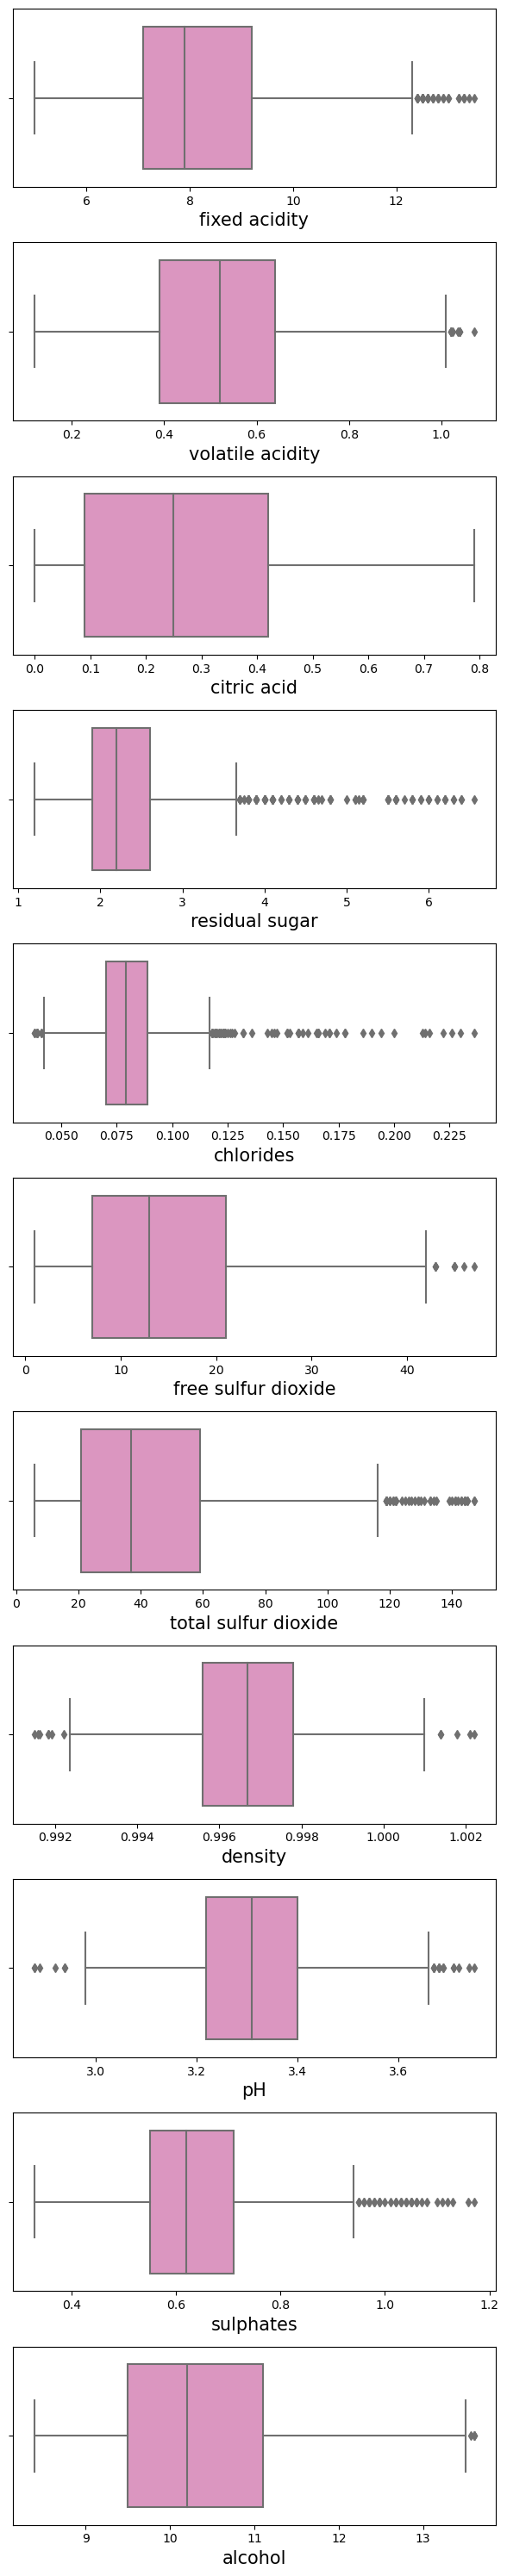

In [47]:
#Outlier Detection

plt.figure(figsize = (6,30), facecolor = 'white')
plotnumber = 1
for col in df2:
    if plotnumber <= 11:
        ax = plt.subplot(11,1, plotnumber)
        sns.boxplot(df2[col], palette = 'Set2_r')
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumber += 1
plt.tight_layout()

outliers have been reduced to some extent, anymore reduction can cause dataloss

# Checking for Skewness

In [48]:
df2.skew()

fixed acidity           0.803687
volatile acidity        0.443794
citric acid             0.277957
residual sugar          2.371572
chlorides               2.480193
free sulfur dioxide     0.867795
total sulfur dioxide    1.165286
density                 0.018132
pH                      0.116731
sulphates               0.952455
alcohol                 0.765872
quality                 2.121367
dtype: float64

We can see skewness in residual sugar, chlorides, fixed acidity, free sulfur dioxide,total sulfur dioxide , sulphates, alcohol

In [49]:
df2.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [50]:
#skewness removal by cuberoot method
df2[['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']] = np.cbrt(df2[['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']])

In [51]:
df2.skew()

fixed acidity           0.505880
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.530428
chlorides               1.192574
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.574020
alcohol                 0.653481
quality                 2.121367
dtype: float64

applying cuberoot method one more time

In [52]:
df2[['fixed acidity','residual sugar','chlorides','sulphates','alcohol']] = np.cbrt(df2[['fixed acidity','residual sugar','chlorides','sulphates','alcohol']])

In [53]:
df2.skew()

fixed acidity           0.404370
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.262634
chlorides               0.816035
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.450143
alcohol                 0.617036
quality                 2.121367
dtype: float64

In [54]:
df2[['residual sugar','chlorides','alcohol']] = np.cbrt(df2[['residual sugar','chlorides','alcohol']])

In [55]:
df2.skew()

fixed acidity           0.404370
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.175342
chlorides               0.695894
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.450143
alcohol                 0.604996
quality                 2.121367
dtype: float64

In [56]:
df2[['residual sugar','chlorides','alcohol']] = np.cbrt(df2[['residual sugar','chlorides','alcohol']])

In [57]:
df2.skew()

fixed acidity           0.404370
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.146477
chlorides               0.656412
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.450143
alcohol                 0.600994
quality                 2.121367
dtype: float64

In [58]:
df2[['residual sugar','chlorides','alcohol']] = np.cbrt(df2[['residual sugar','chlorides','alcohol']])

In [59]:
df2.skew()

fixed acidity           0.404370
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.136882
chlorides               0.643313
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.450143
alcohol                 0.599662
quality                 2.121367
dtype: float64

In [60]:
df2[['residual sugar','chlorides','alcohol']] = np.cbrt(df2[['residual sugar','chlorides','alcohol']])

In [61]:
df2.skew()

fixed acidity           0.404370
volatile acidity        0.443794
citric acid             0.277957
residual sugar          1.133687
chlorides               0.638953
free sulfur dioxide     0.128477
total sulfur dioxide    0.334160
density                 0.018132
pH                      0.116731
sulphates               0.450143
alcohol                 0.599218
quality                 2.121367
dtype: float64

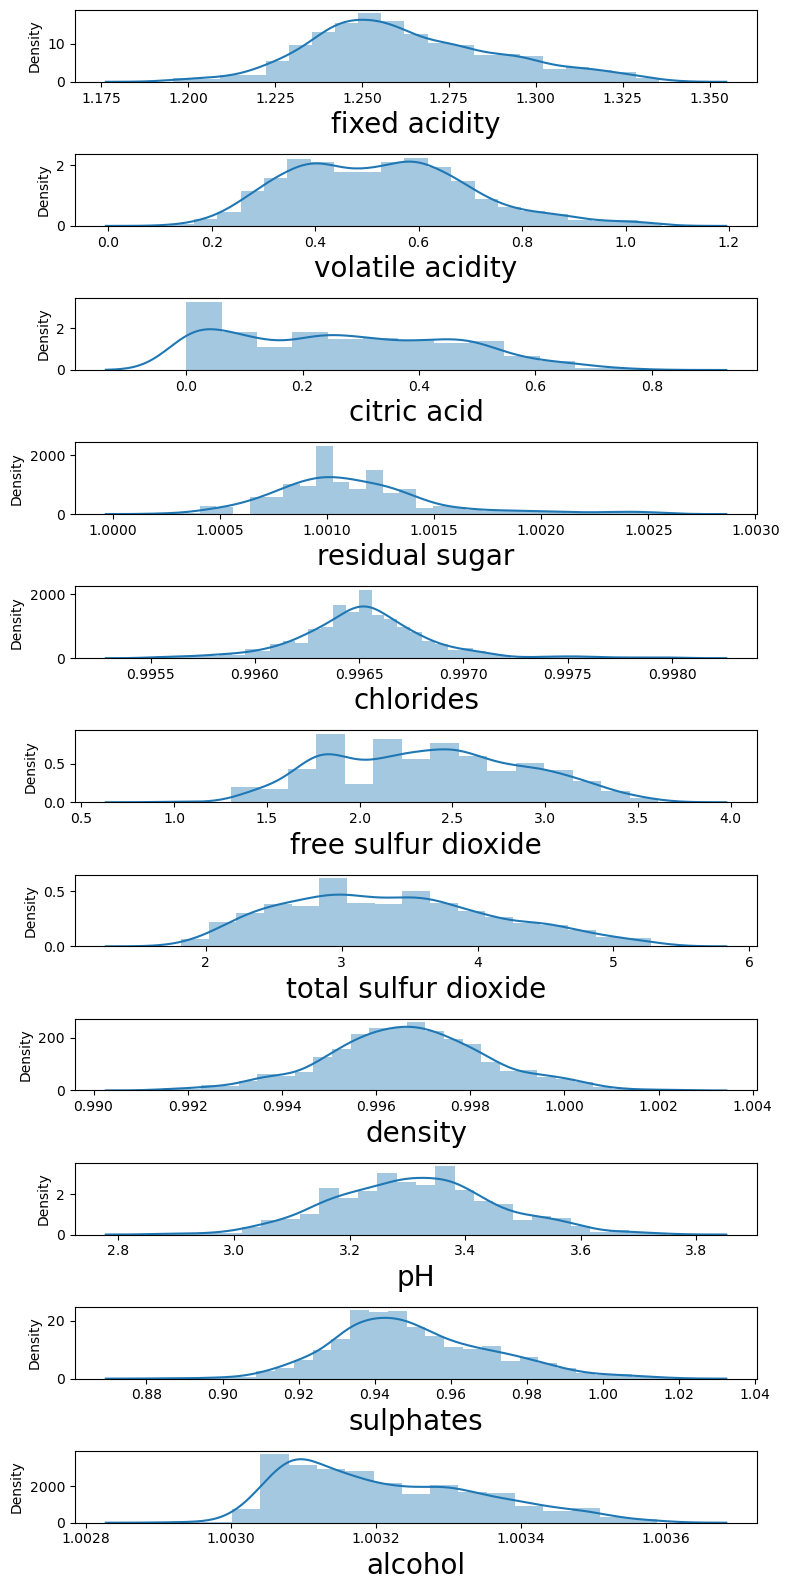

In [62]:
#plotting graph to check skewness
plt.figure(figsize = (8,16), facecolor = 'white')
plotnumber = 1 # assigning variable

for column in df2:
    if plotnumber<= 11:
        ax = plt.subplot(11,1,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1

plt.tight_layout()

from  the above graph we can observe that skewness has reduced to some extent in all the columns and the graph looks like normally distributed

In [63]:
df2.shape

(1239, 12)

In [64]:
df2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [65]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

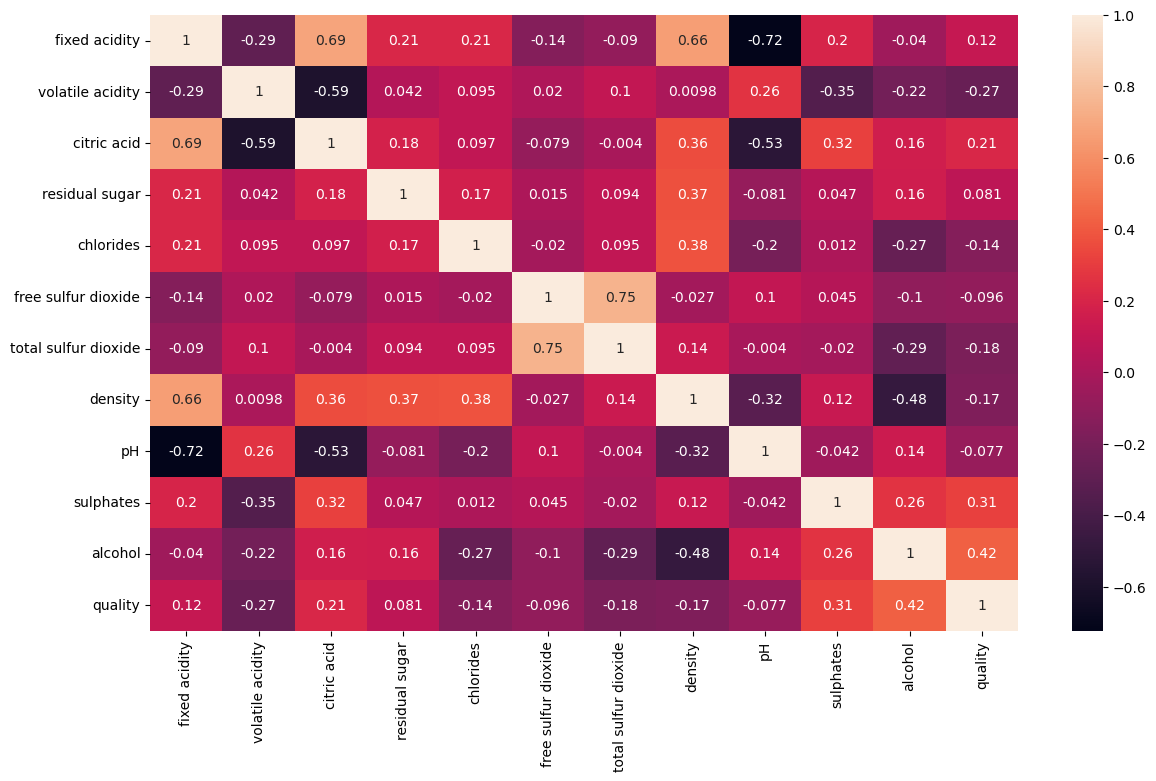

In [66]:
plt.figure(figsize = (14,8))
sns.heatmap(df2.corr(),annot = True, annot_kws = {'size':10})
plt.show()

In [67]:
#seperating features and target variables
y = df2['quality']
X = df2.drop('quality', axis = 1)

# Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
x


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.512580          1.009464    -1.392862       -0.629694  -0.176498   
1         -0.240450          2.050338    -1.392862        0.471780   0.874531   
2         -0.240450          1.356422    -1.183521        0.041180   0.613309   
3          1.673426         -1.419242     1.537914       -0.629694  -0.231244   
4         -0.512580          0.778159    -1.392862       -0.819515  -0.231244   
...             ...               ...          ...             ...        ...   
1234      -0.946362          0.546853    -0.974180       -0.629694  -0.636200   
1235      -1.415605          0.431201    -0.974180       -0.449600   0.522439   
1236      -1.665570          0.142069    -0.869509       -0.114925  -1.017931   
1237      -1.665570          0.691419    -0.764839       -0.449600  -0.231244   
1238      -1.581017         -1.245763     1.066897        1.615069  -0.697426   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.285969             -0.165656  0.650860  1.394315   
1                1.088266              0.905298  0.068312 -0.806846   
2                0.189553              0.538142  0.184821 -0.380815   
3                0.395814              0.714179  0.767369 -1.090867   
4               -0.035961              0.069321  0.650860  1.394315   
...                   ...                   ...       ...       ...   
1234             1.309253             -0.006221 -0.100627  0.755268   
1235             1.580577              0.213163 -1.038529  0.968284   
1236             2.005408              0.445197 -0.910368  1.465320   
1237             1.580577              0.213163 -0.706477  1.820346   
1238             0.492908              0.142384 -0.694826  0.542253   

      sulphates   alcohol  
0     -0.612435 -1.017221  
1      0.385942 -0.586597  
2      0.152001 -0.586597  
3     -0.433581 -0.586597  
4     -0.612435 -1.017221  
...         ...       ...  
1234   1.369221 -0.907873  
1235  -0.433581  0.126395  
1236   0.967657  0.793415  
1237   0.610881 -0.173179  
1238   0.231029  0.607184  

[1239 rows x 11 columns]

# Variance inflation factor

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF Values              Features
0     8.073866         fixed acidity
1     1.841776      volatile acidity
2     3.065910           citric acid
3     1.735307        residual sugar
4     1.231433             chlorides
5     2.564353   free sulfur dioxide
6     2.908579  total sulfur dioxide
7     6.713076               density
8     3.398074                    pH
9     1.365530             sulphates
10    3.404967               alcohol

setting a threshold of 5 and dropping fixed acidity column to see if it effects my collinearity

In [70]:
x.drop('fixed acidity', axis = 1, inplace = True)

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF Values              Features
0    1.840154      volatile acidity
1    2.768230           citric acid
2    1.529465        residual sugar
3    1.217991             chlorides
4    2.522224   free sulfur dioxide
5    2.773400  total sulfur dioxide
6    2.740341               density
7    1.543191                    pH
8    1.343693             sulphates
9    2.502846               alcohol

In [72]:
#Multicollinearity issue looks like to be taken care of

In [73]:
y.value_counts()

0    1070
1     169
Name: quality, dtype: int64

In [74]:
x.shape

(1239, 10)

#target looks imbalanced so we are going to apply upsampling or oversampling method using smote

In [75]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

Defaulting to user installation because normal site-packages is not writeable


In [76]:
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [77]:
y1.value_counts()

0    1070
1    1070
Name: quality, dtype: int64

# MODELLING

In [78]:
#finding random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.30,random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i 
print('Best Accuracy is =', maxAccu,'at random state =', maxRS )


Best Accuracy is = 0.9501557632398754 at random state = 58


The best accuracy is 95.01% at random state = 58

In [79]:
#Creating train and test split at random state = 58
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.30,random_state = maxRS)

In [80]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [81]:
import xgboost as xgb

In [82]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [83]:
#random Forest classifier
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)
predRFC = RFR.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

accuracy score is =  0.9485981308411215
[[296  25]
 [  8 313]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       321
           1       0.93      0.98      0.95       321

    accuracy                           0.95       642
   macro avg       0.95      0.95      0.95       642
weighted avg       0.95      0.95      0.95       642



the accuracy for this model is 94.7%

In [84]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

accuracy score is =  0.8317757009345794
[[266  55]
 [ 53 268]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       321
           1       0.83      0.83      0.83       321

    accuracy                           0.83       642
   macro avg       0.83      0.83      0.83       642
weighted avg       0.83      0.83      0.83       642



the accuracy for this model is 83.8%

In [85]:
#XGboost

xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)
predXGB = xgb.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))


accuracy score is =  0.9470404984423676
[[293  28]
 [  6 315]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       321
           1       0.92      0.98      0.95       321

    accuracy                           0.95       642
   macro avg       0.95      0.95      0.95       642
weighted avg       0.95      0.95      0.95       642



the accuracy for this model is 94.7%

In [86]:
#SVM classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


accuracy score is =  0.8862928348909658
[[266  55]
 [ 18 303]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       321
           1       0.85      0.94      0.89       321

    accuracy                           0.89       642
   macro avg       0.89      0.89      0.89       642
weighted avg       0.89      0.89      0.89       642



the accuracy for this model is 88.6%

In [87]:
#Gradient Boosting Classifier

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

accuracy score is =  0.9127725856697819
[[283  38]
 [ 18 303]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       321
           1       0.89      0.94      0.92       321

    accuracy                           0.91       642
   macro avg       0.91      0.91      0.91       642
weighted avg       0.91      0.91      0.91       642



the accuracy for this model is 91.2%

In [88]:
#AdaBoost Classifier


abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc = abc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

accuracy score is =  0.8722741433021807
[[274  47]
 [ 35 286]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       321
           1       0.86      0.89      0.87       321

    accuracy                           0.87       642
   macro avg       0.87      0.87      0.87       642
weighted avg       0.87      0.87      0.87       642



the accuracy for this model is 87.2%

In [89]:
#Bagging Classifier


bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predabc))

accuracy score is =  0.9003115264797508
[[285  36]
 [ 28 293]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       321
           1       0.86      0.89      0.87       321

    accuracy                           0.87       642
   macro avg       0.87      0.87      0.87       642
weighted avg       0.87      0.87      0.87       642



the accuracy for this model is 90.03%

In [90]:
#ExtraTrees Classifier


et = ExtraTreesClassifier()
et.fit(x_train,y_train)
predet = et.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

accuracy score is =  0.9595015576323987
[[297  24]
 [  2 319]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       321
           1       0.93      0.99      0.96       321

    accuracy                           0.96       642
   macro avg       0.96      0.96      0.96       642
weighted avg       0.96      0.96      0.96       642



the accuracy for this model is 95.9%

# Cross Validation

In [91]:
#random forest
score = cross_val_score(RFR,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predRFC)- score.mean())

[0.94859813 0.88551402 0.94626168 0.86915888 0.91121495]
0.9121495327102803
Difference between Accuracy score and  cross validation score is = 0.036448598130841225


In [92]:
#logistic regression
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predLR)- score.mean())

[0.88551402 0.78971963 0.85514019 0.73598131 0.80607477]
0.8144859813084112
Difference between Accuracy score and  cross validation score is = 0.01728971962616821


In [93]:
#XGboost
score = cross_val_score(xgb,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predXGB)- score.mean())

[0.92990654 0.89252336 0.94859813 0.87616822 0.9088785 ]
0.911214953271028
Difference between Accuracy score and  cross validation score is = 0.03582554517133962


In [94]:
#Gradient Boosting Classifier
score = cross_val_score(gb,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predgb)- score.mean())

[0.89252336 0.85514019 0.9228972  0.81775701 0.85747664]
0.8691588785046729
Difference between Accuracy score and  cross validation score is = 0.04361370716510904


In [95]:
#SVM
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predsvc)- score.mean())

[0.92990654 0.8317757  0.90420561 0.81074766 0.83878505]
0.8630841121495326
Difference between Accuracy score and  cross validation score is = 0.023208722741433152


In [96]:
#Ada Boosting
score = cross_val_score(abc,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predabc)- score.mean())

[0.86915888 0.84579439 0.88551402 0.79672897 0.8364486 ]
0.846728971962617
Difference between Accuracy score and  cross validation score is = 0.025545171339563688


In [97]:
#Bagging
score = cross_val_score(bc,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predbc)- score.mean())

[0.90420561 0.87850467 0.92523364 0.86915888 0.88551402]
0.8925233644859812
Difference between Accuracy score and  cross validation score is = 0.007788161993769527


In [98]:
#Extra Trees
score = cross_val_score(et,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predet)- score.mean())

[0.97429907 0.89252336 0.96261682 0.86915888 0.93224299]
0.9261682242990654
Difference between Accuracy score and  cross validation score is = 0.033333333333333326


Bagging Classifier is our best model as difference between accuracy score and cross validation score is least

# Bagging Classifier is our best model

# HYPERPARAMETER Tuning

In [125]:
#Bagging Classifier

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [10, 50, 100],
             'max_samples': [0.5, 0.7, 1.0],
             'bootstrap': [True, False],
             'max_features': [1, 2, 3],
             'oob_score': [True, False]}

In [126]:
GCV = GridSearchCV(BaggingClassifier(),parameters,cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [1, 2, 3],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100],
                         'oob_score': [True, False]})

In [128]:
final_model = GCV.best_estimator_
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

93.76947040498442


In [ ]:
# with these parameters the accuracy score has improved

# Plotting ROC, AUC curve

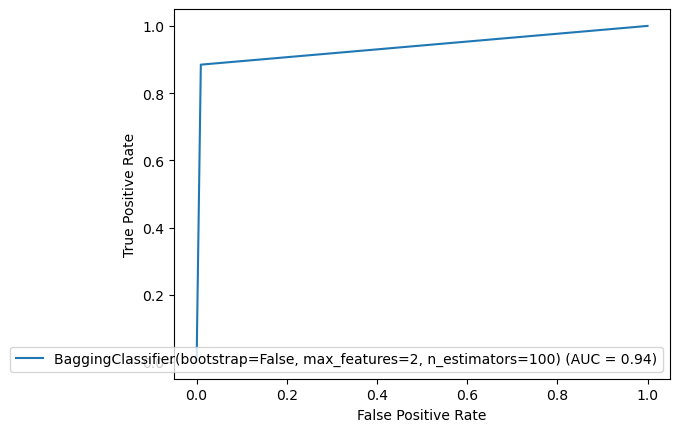

In [133]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr,tpr=tpr,roc_auc = roc_auc,estimator_name = final_model)
display.plot()

# AUC is close to 1 which means our model will perform well

In [134]:
#Saving the model
import pickle
filename = 'WineQuality.pkl'
pickle.dump(final_model,open(filename,'wb'))


In [135]:
import pickle
loaded_model = pickle.load(open('WineQuality.pkl','rb'))
prediction = loaded_model.predict(x_test)
prediction

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,

In [136]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

Predicted  Original
0            0         0
1            1         1
2            0         0
3            1         1
4            0         0
..         ...       ...
637          0         0
638          0         0
639          1         1
640          0         0
641          1         1

[642 rows x 2 columns]